In [2]:
import tensorflow.compat.v1 as tf1
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "2"
config = tf1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
session = tf1.Session(config=config)

2024-06-24 05:30:18.353156: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20169 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:86:00.0, compute capability: 8.0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = "/home/a202192006/kaggle(캐글)/Classification with an Academic Success Dataset/data/"

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submit = pd.read_csv(path + 'sample_submission.csv')

# data columns
- `id`
- `Marital status (결혼 상태)`
- `Application mode (신청 방법)`
- `Application order (신청 순서)`
- `Course (과정)`
- `Daytime/evening attendance (주간/야간 출석)`
- `Previous qualification (이전 자격)`
- `Previous qualification (grade) (이전 자격 성적)`
- `Nacionality (국적)`
- `Mother's qualification (어머니의 자격)`
- `Father's qualification (아버지의 자격)`
- `Mother's occupation (어머니의 직업)`
- `Father's occupation (아버지의 직업)`
- `Admission grade (입학 성적)`
- `Displaced (이주자)`
- `Educational special needs (특수 교육 필요)`
- `Debtor (채무자)`
- `Tuition fees up to date (등록금 납부 상태)`
- `Gender (성별)`
- `Scholarship holder (장학금 수혜자)`
- `Age at enrollment (입학 시 나이)`
- `International (국제 학생)`
- `Curricular units 1st sem (credited) (1학기 학점 이수 과목)`
- `Curricular units 1st sem (enrolled) (1학기 수강 과목)`
- `Curricular units 1st sem (evaluations) (1학기 평가 과목)`
- `Curricular units 1st sem (approved) (1학기 승인된 과목)`
- `Curricular units 1st sem (grade) (1학기 성적)`
- `Curricular units 1st sem (without evaluations) (1학기 평가 없는 과목)`
- `Curricular units 2nd sem (credited) (2학기 학점 이수 과목)`
- `Curricular units 2nd sem (enrolled) (2학기 수강 과목)`
- `Curricular units 2nd sem (evaluations) (2학기 평가 과목)`
- `Curricular units 2nd sem (approved) (2학기 승인된 과목)`
- `Curricular units 2nd sem (grade) (2학기 성적)`
- `Curricular units 2nd sem (without evaluations) (2학기 평가 없는 과목)`
- `Unemployment rate (실업률)`
- `Inflation rate (인플레이션율)`
- `GDP (국내 총생산)`
- `Target (목표)`

In [3]:
train

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [5]:
train.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000


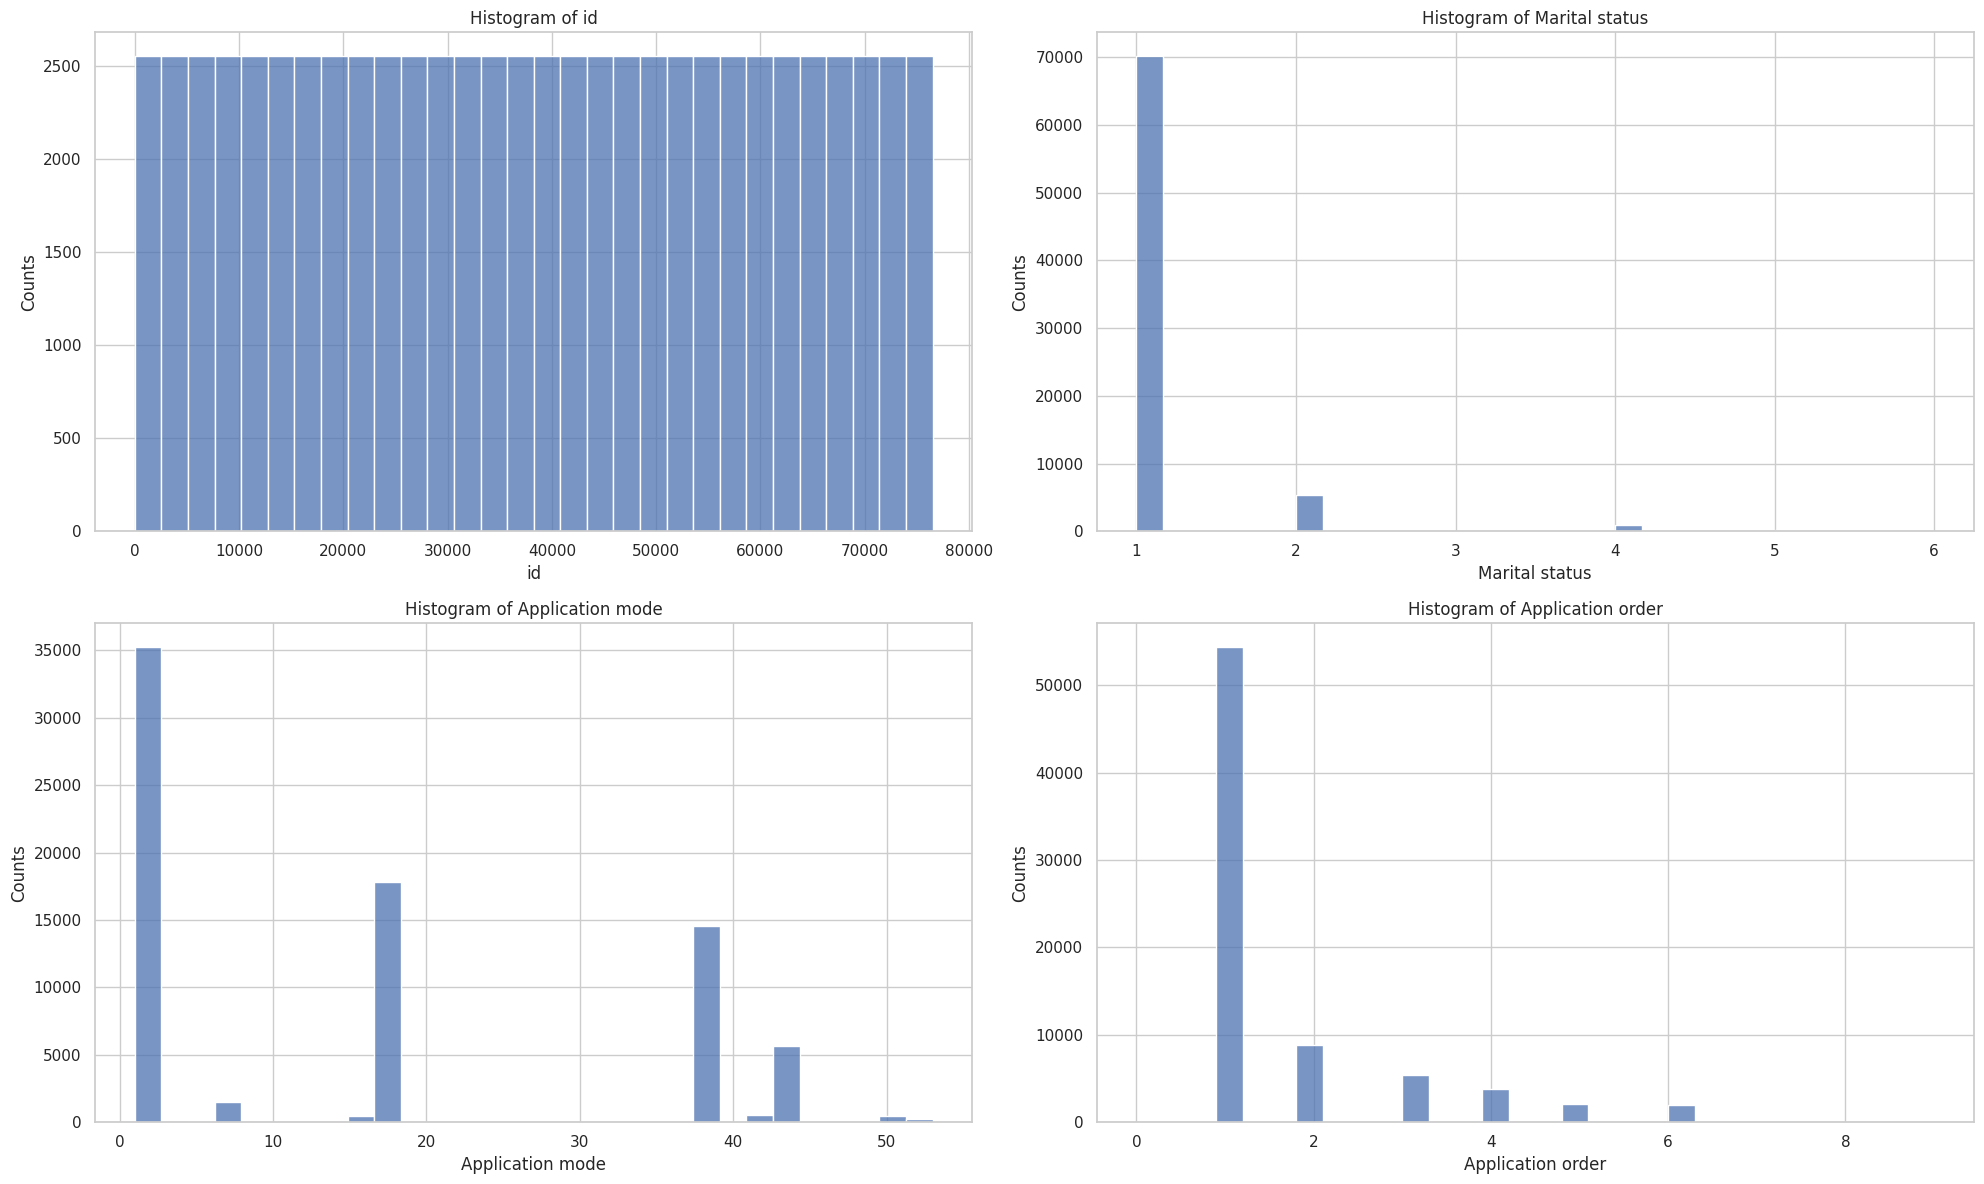

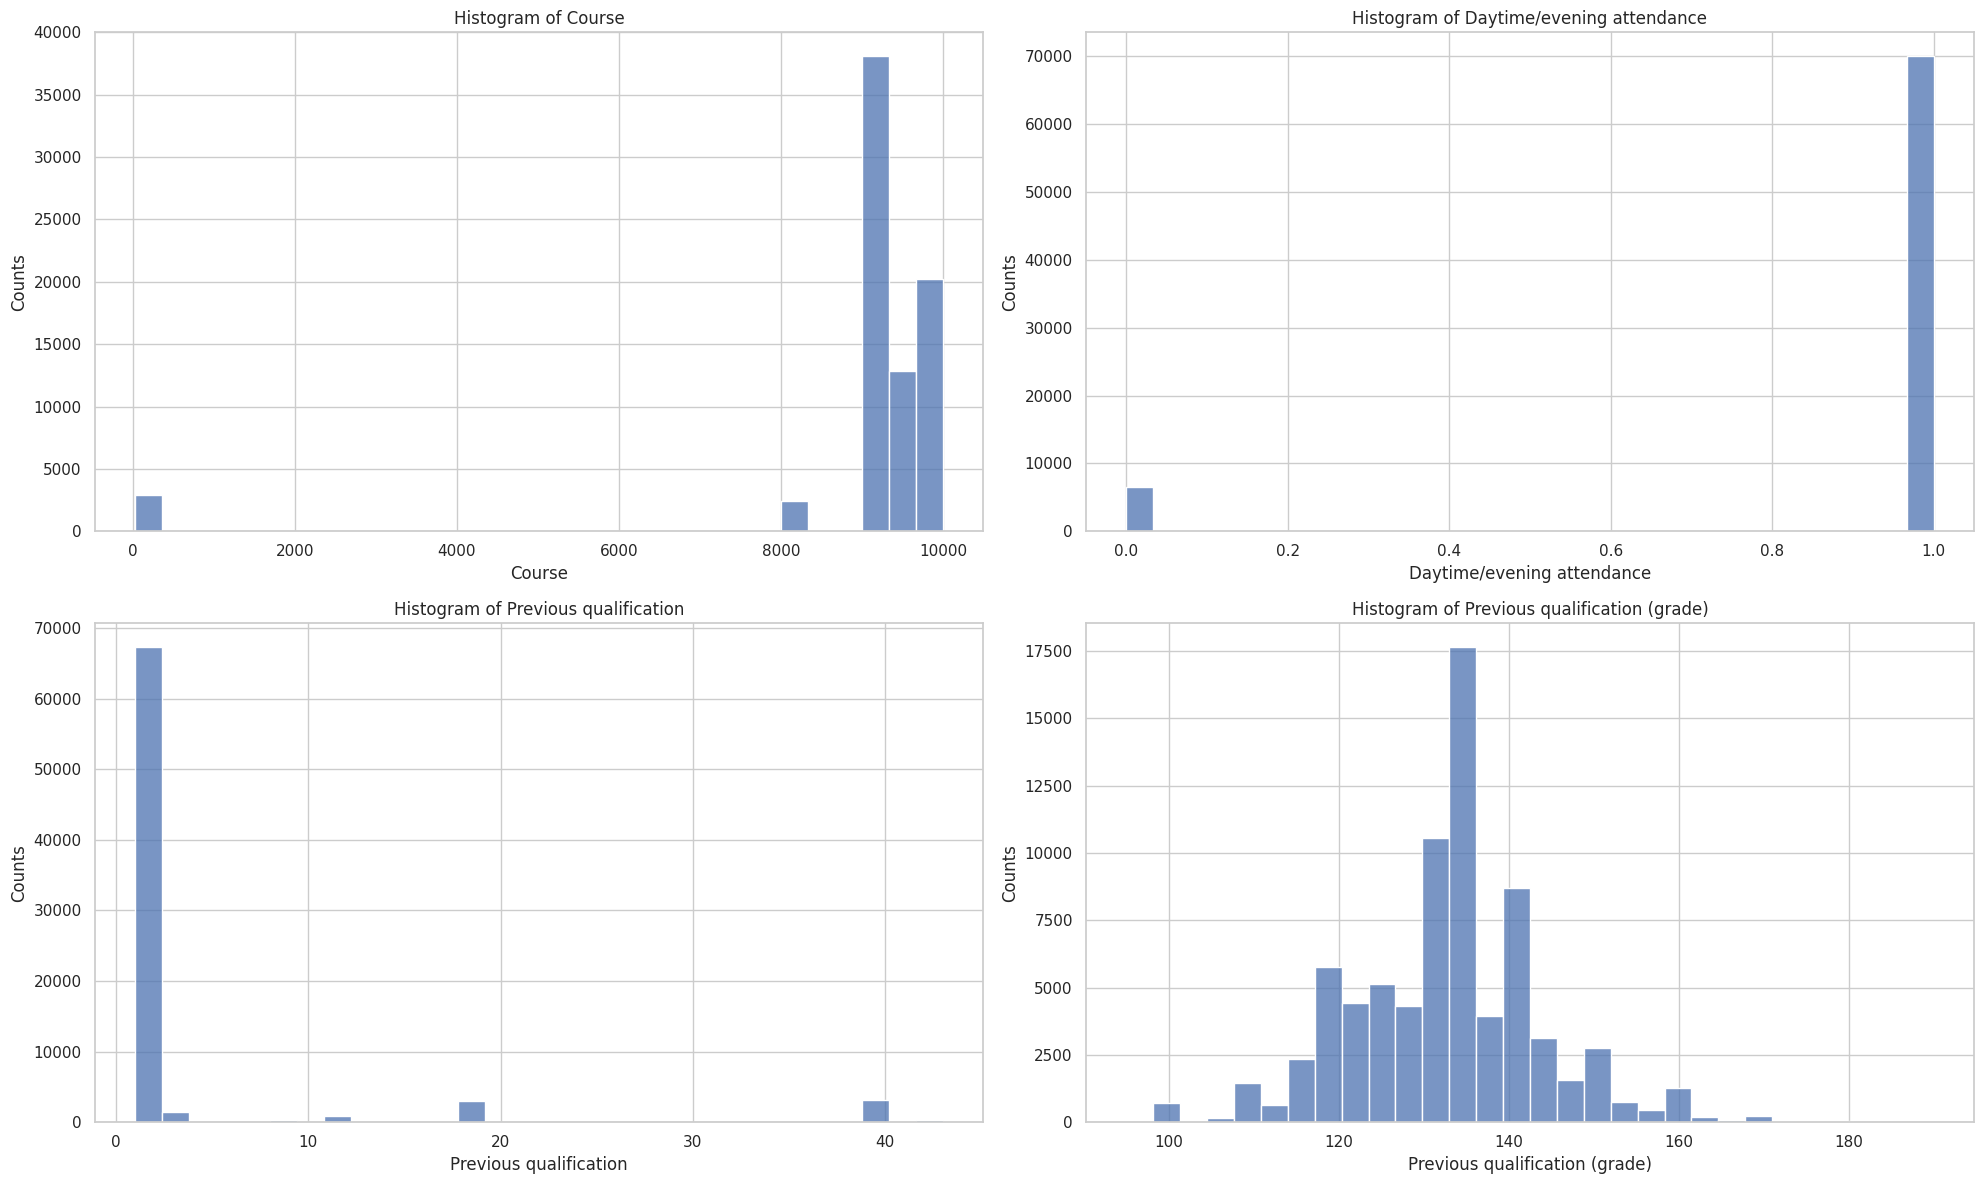

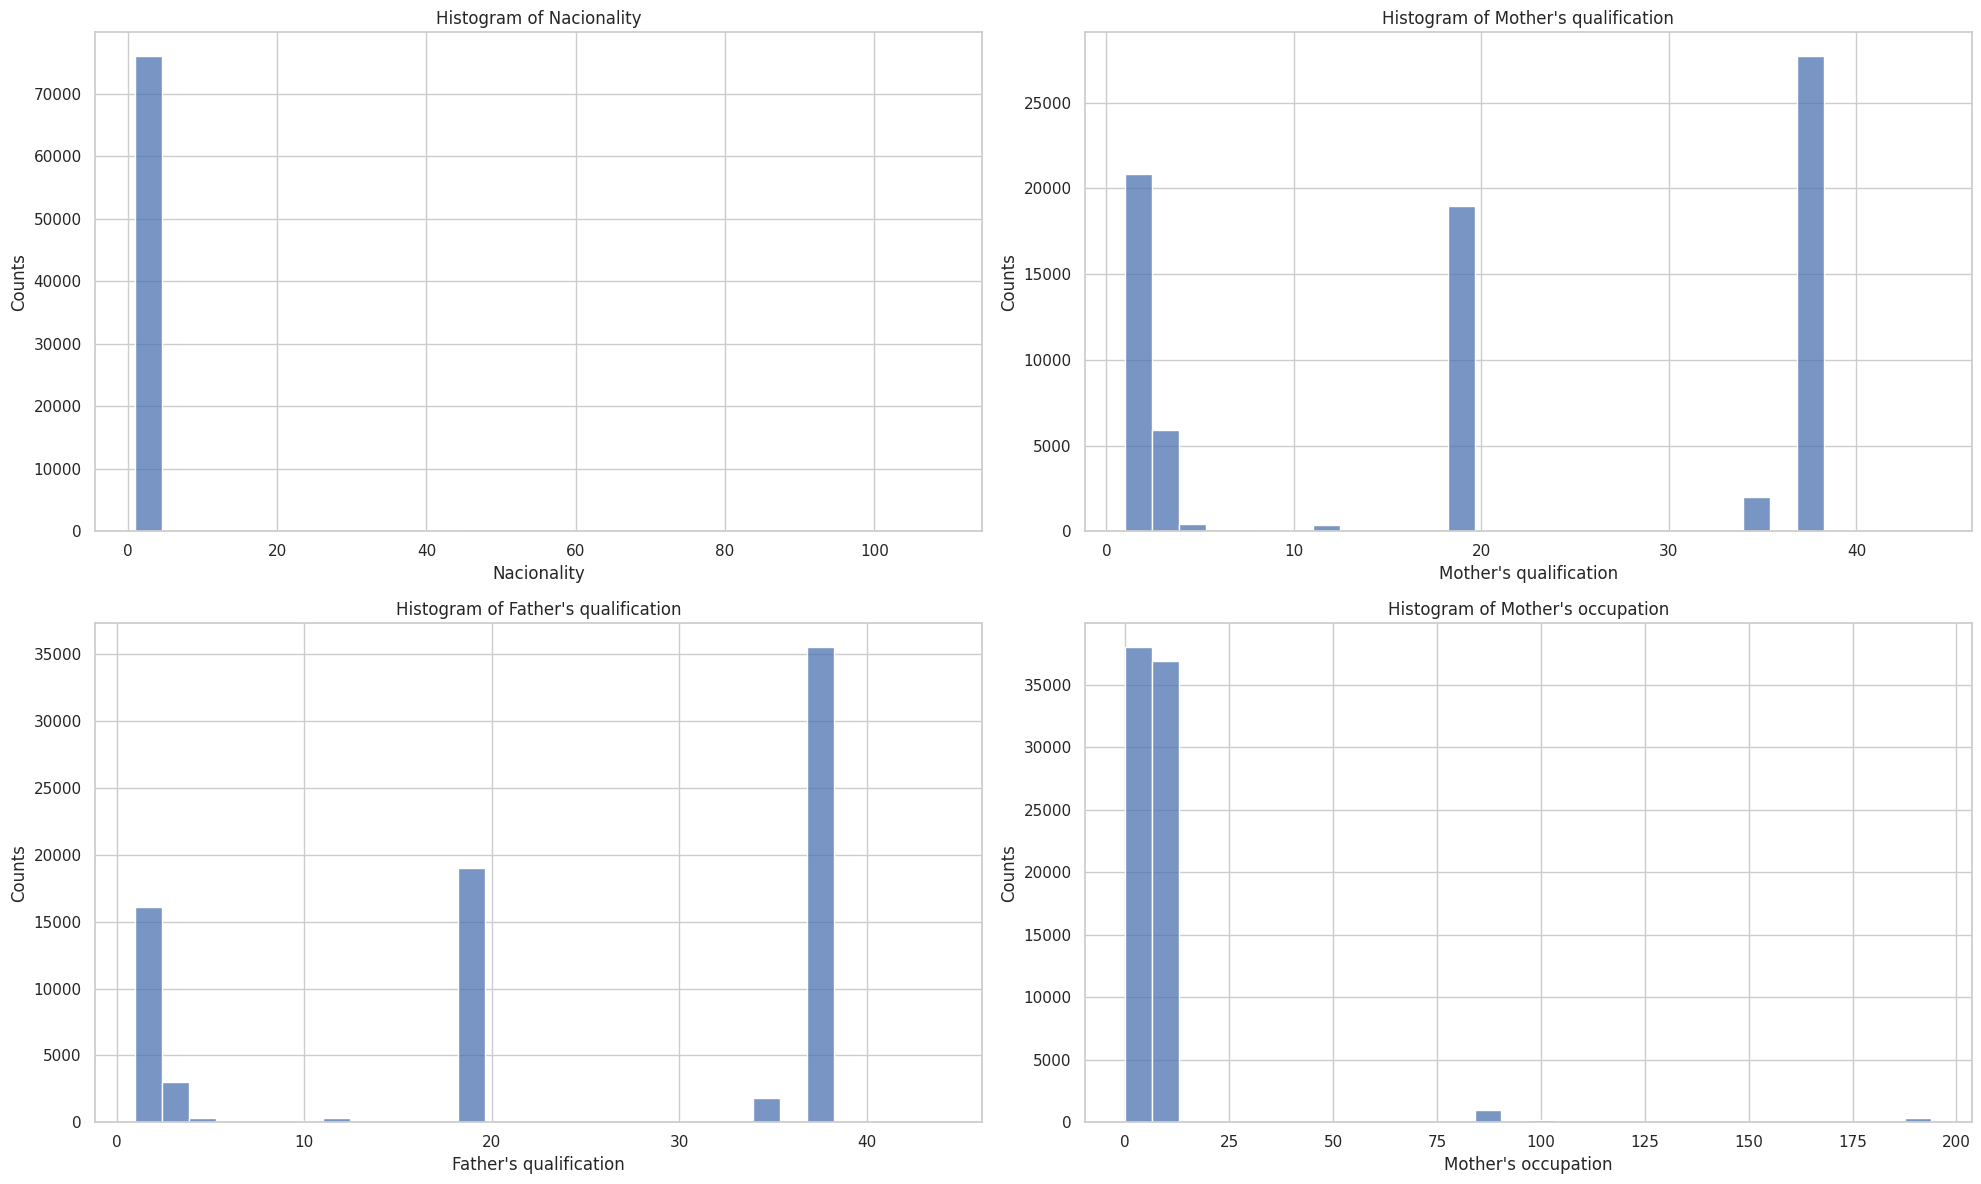

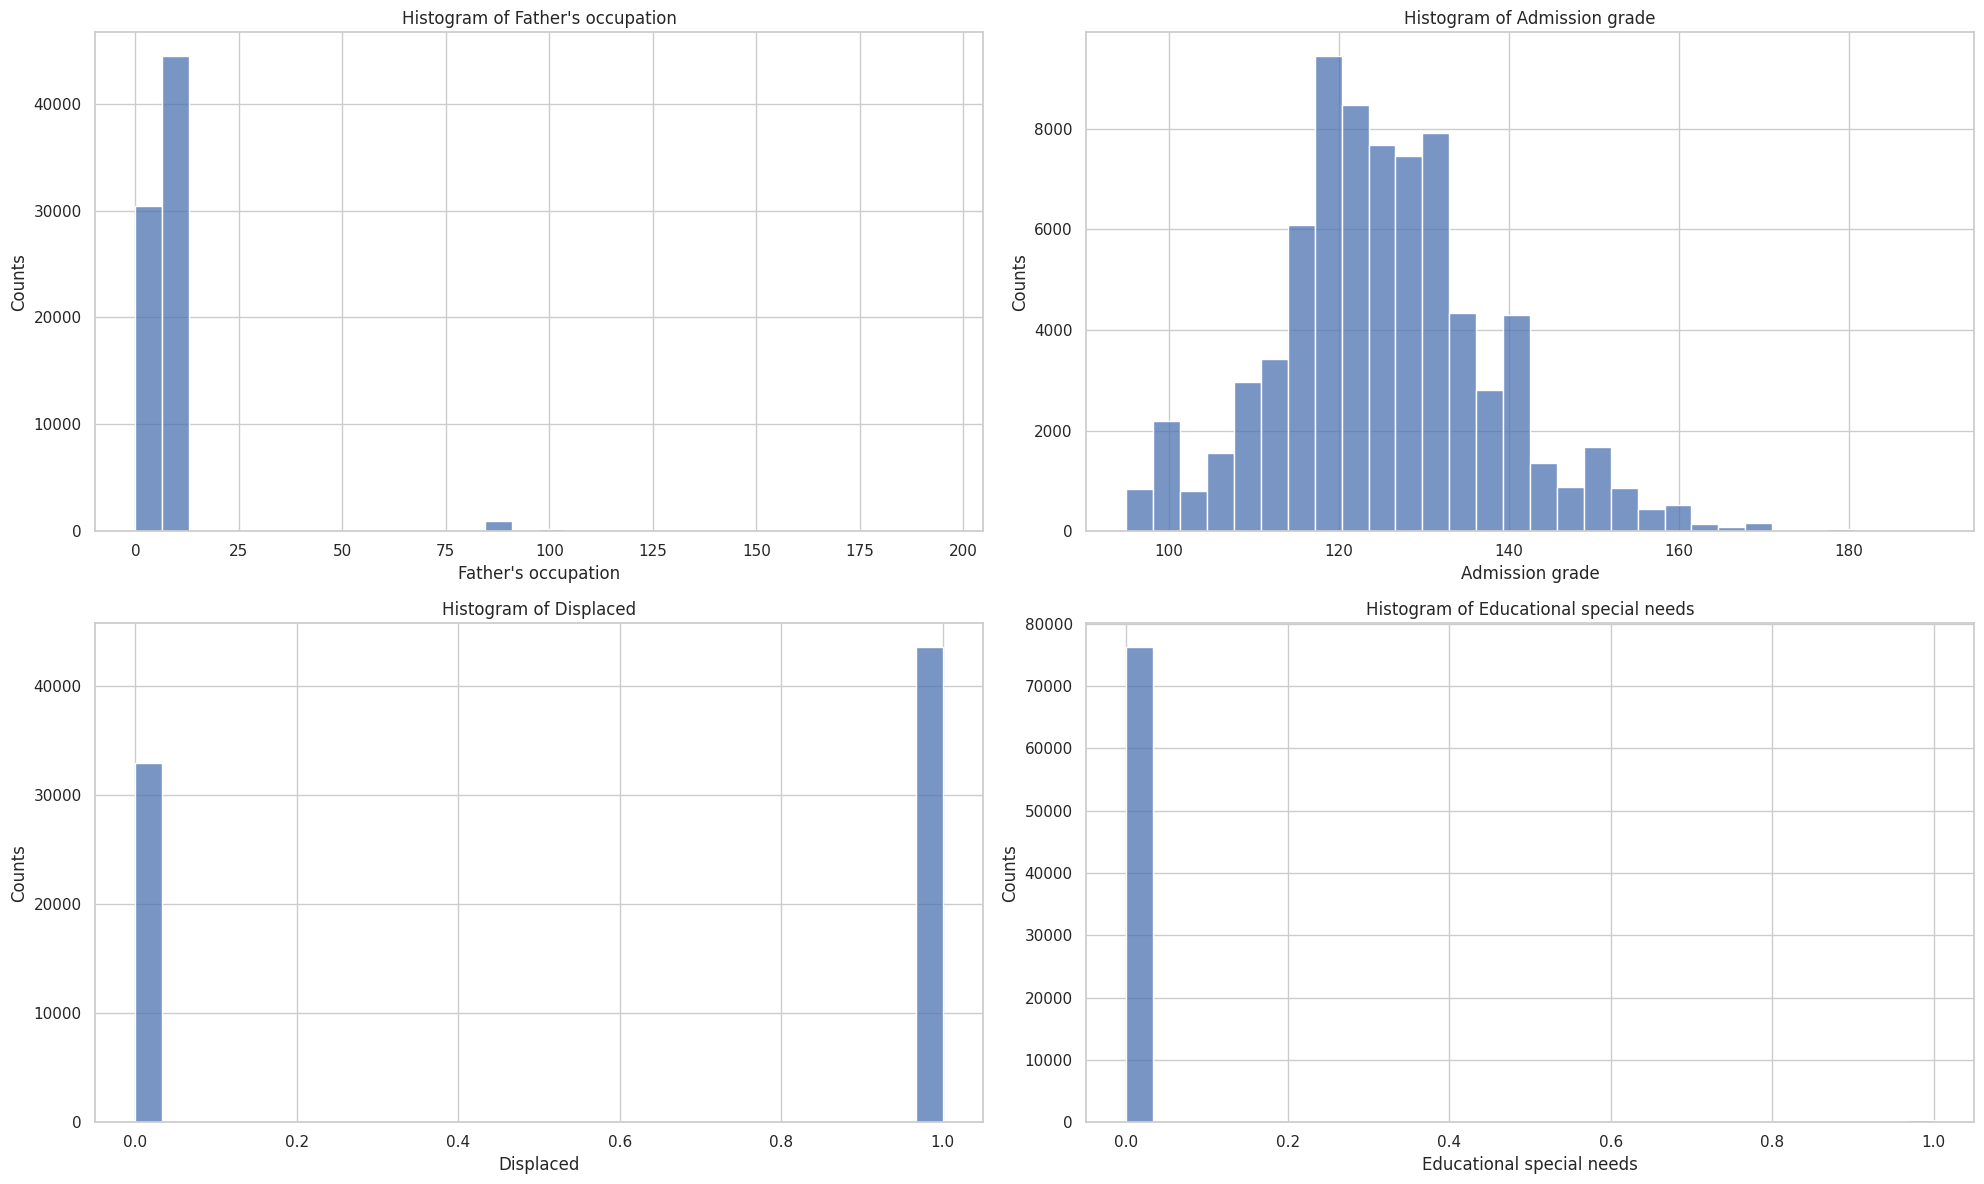

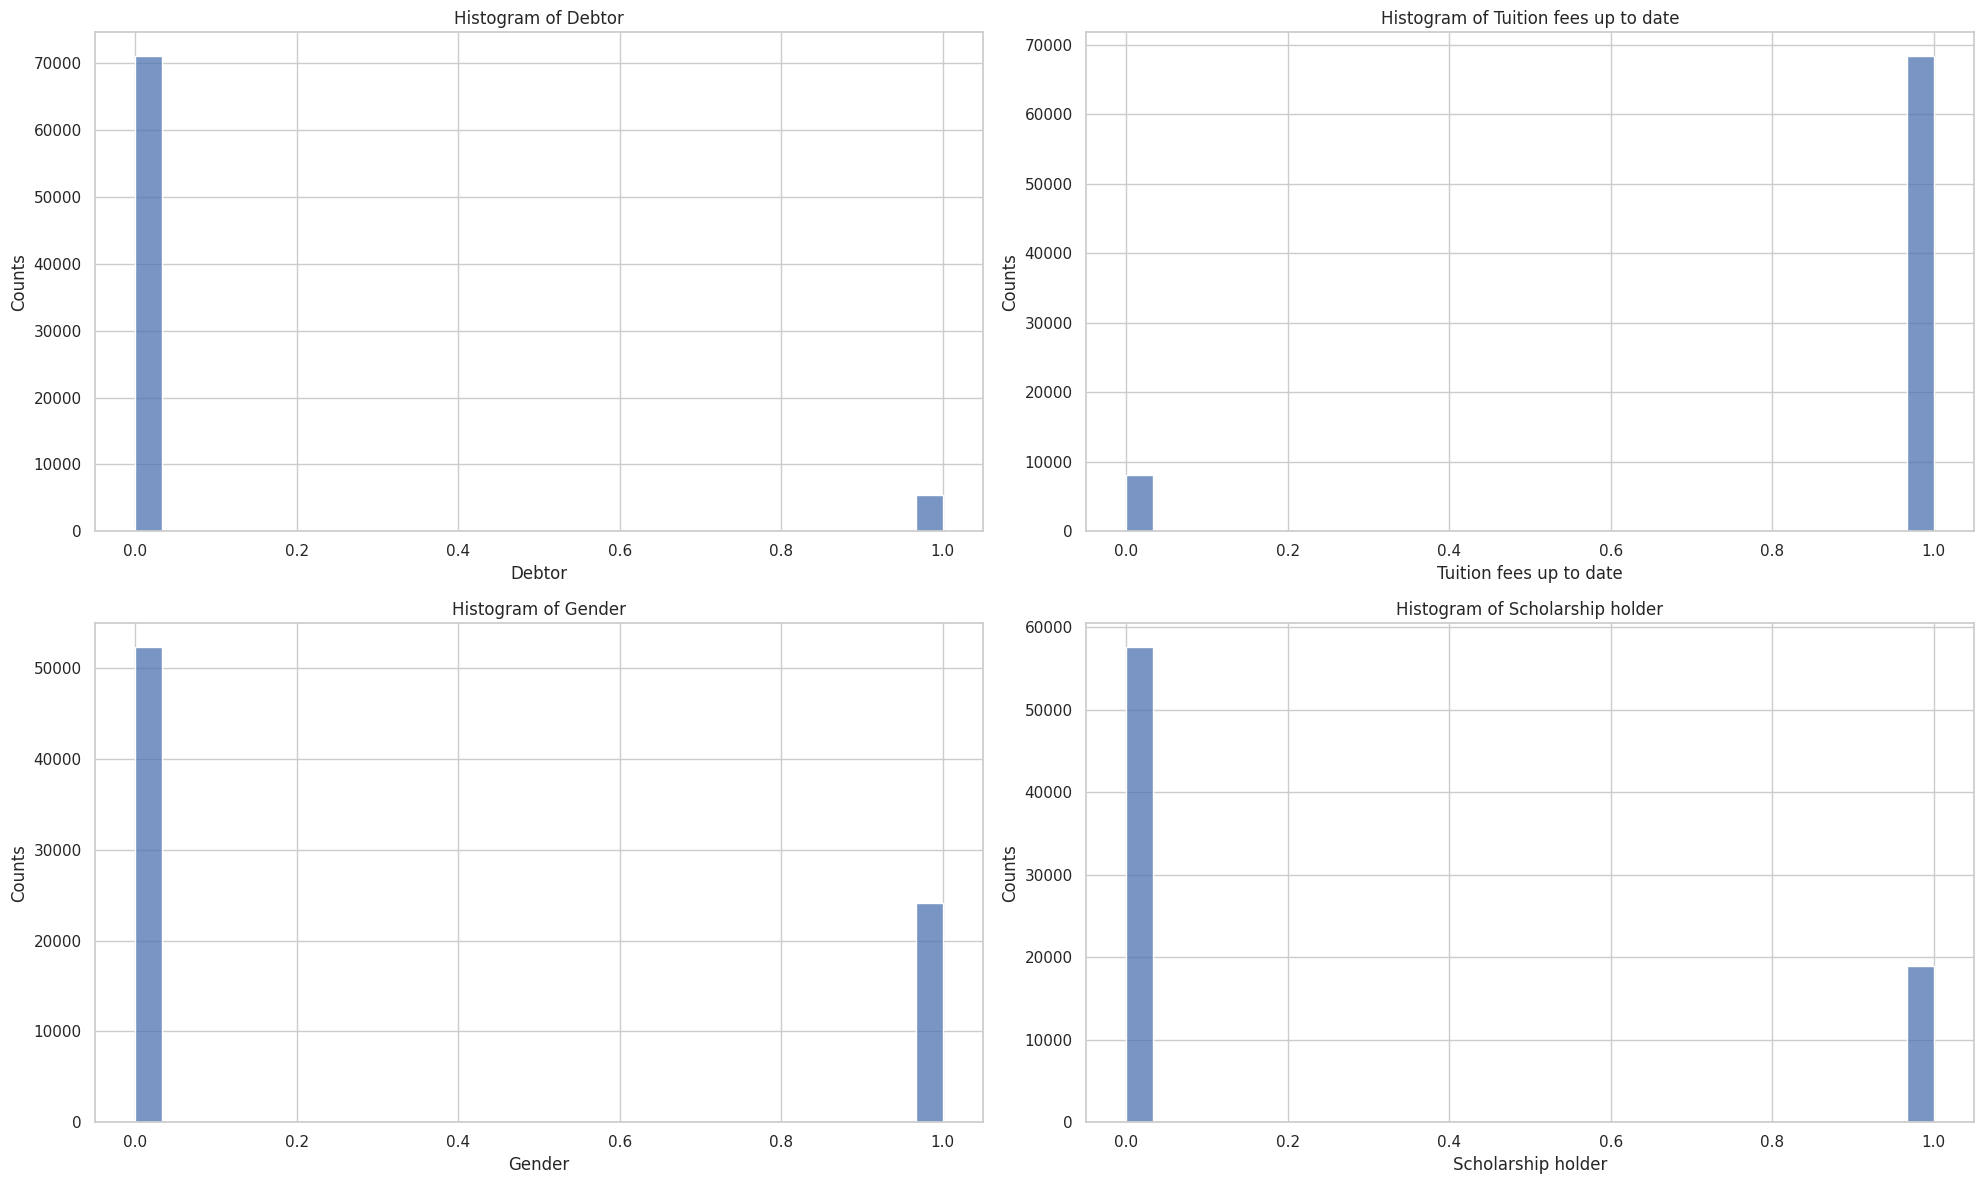

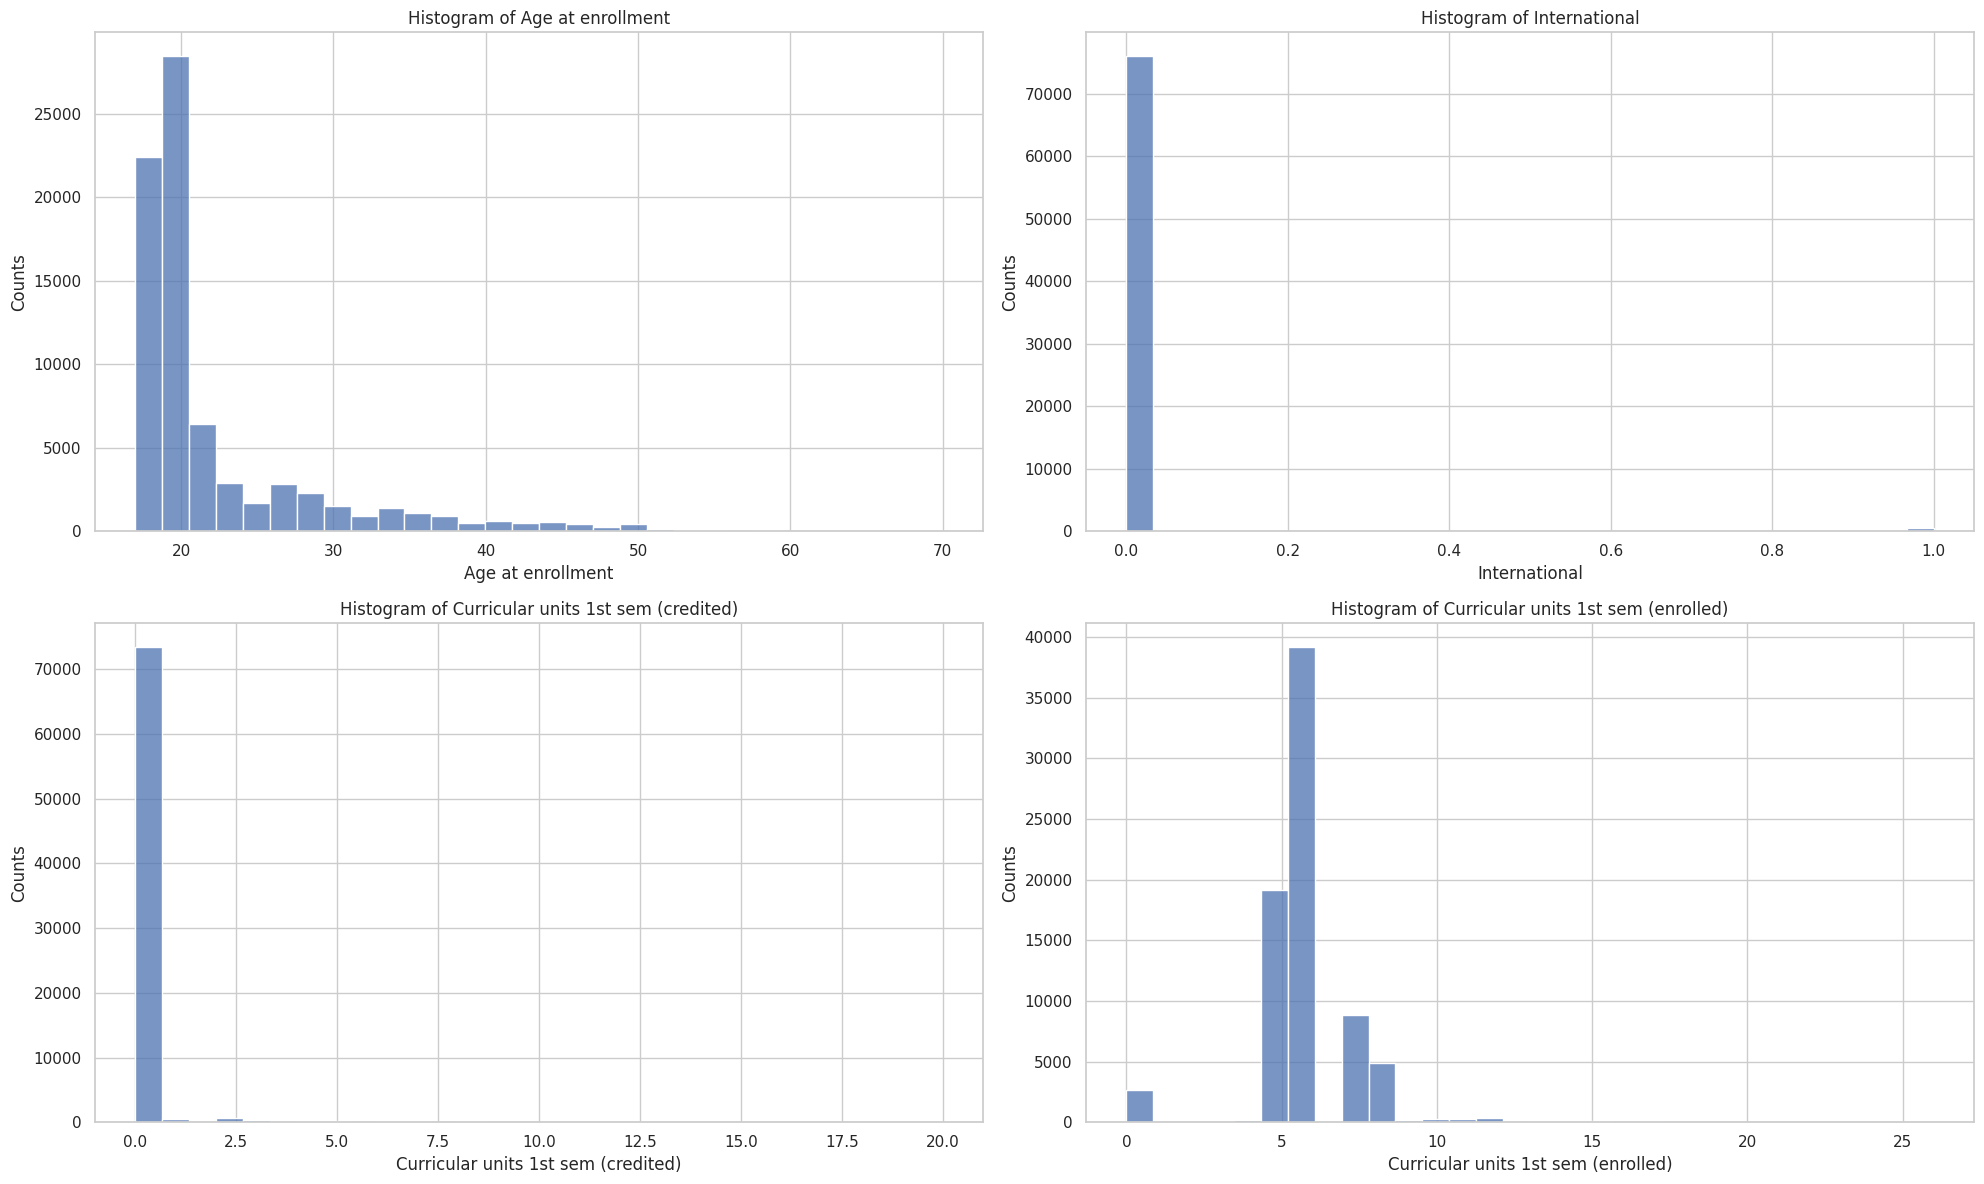

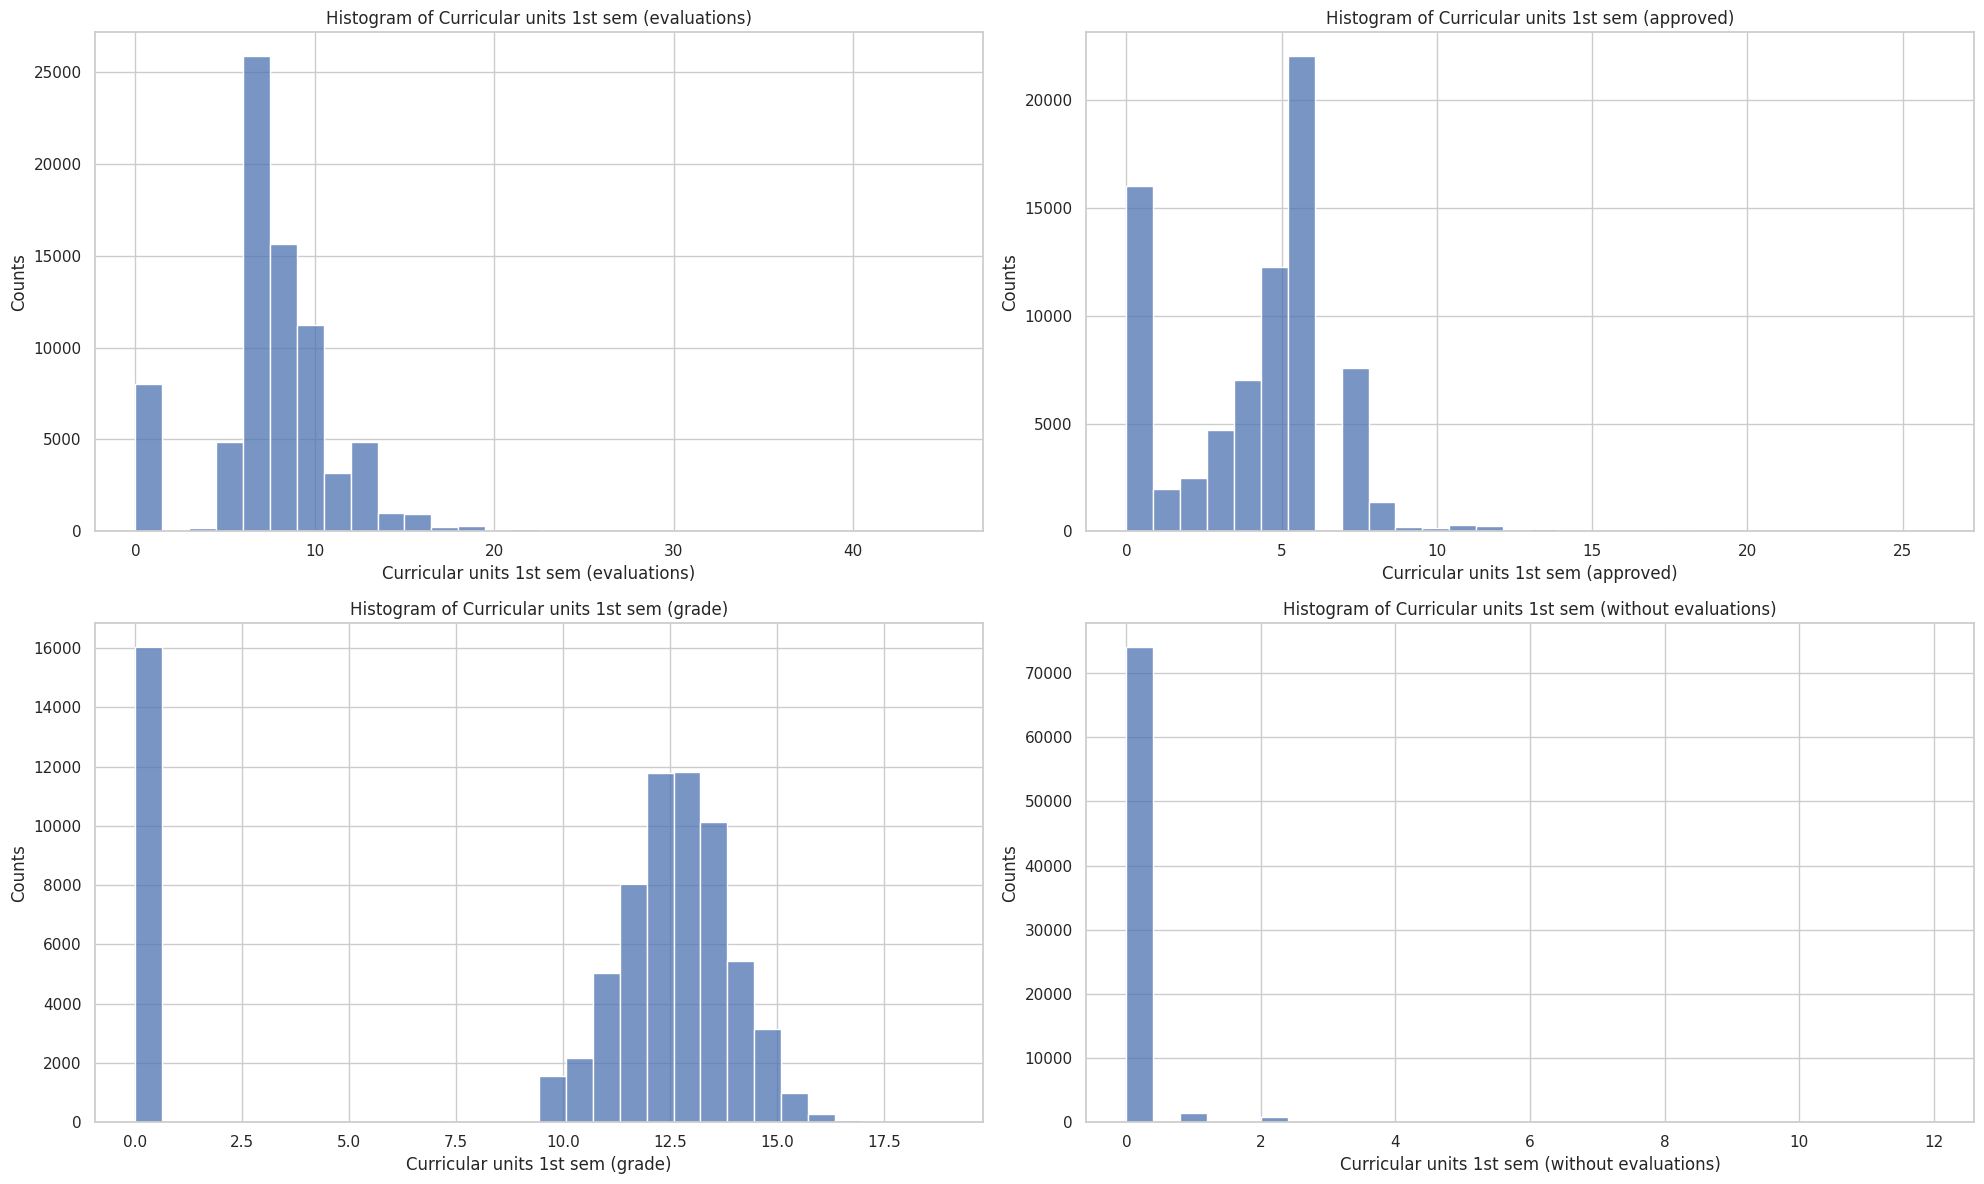

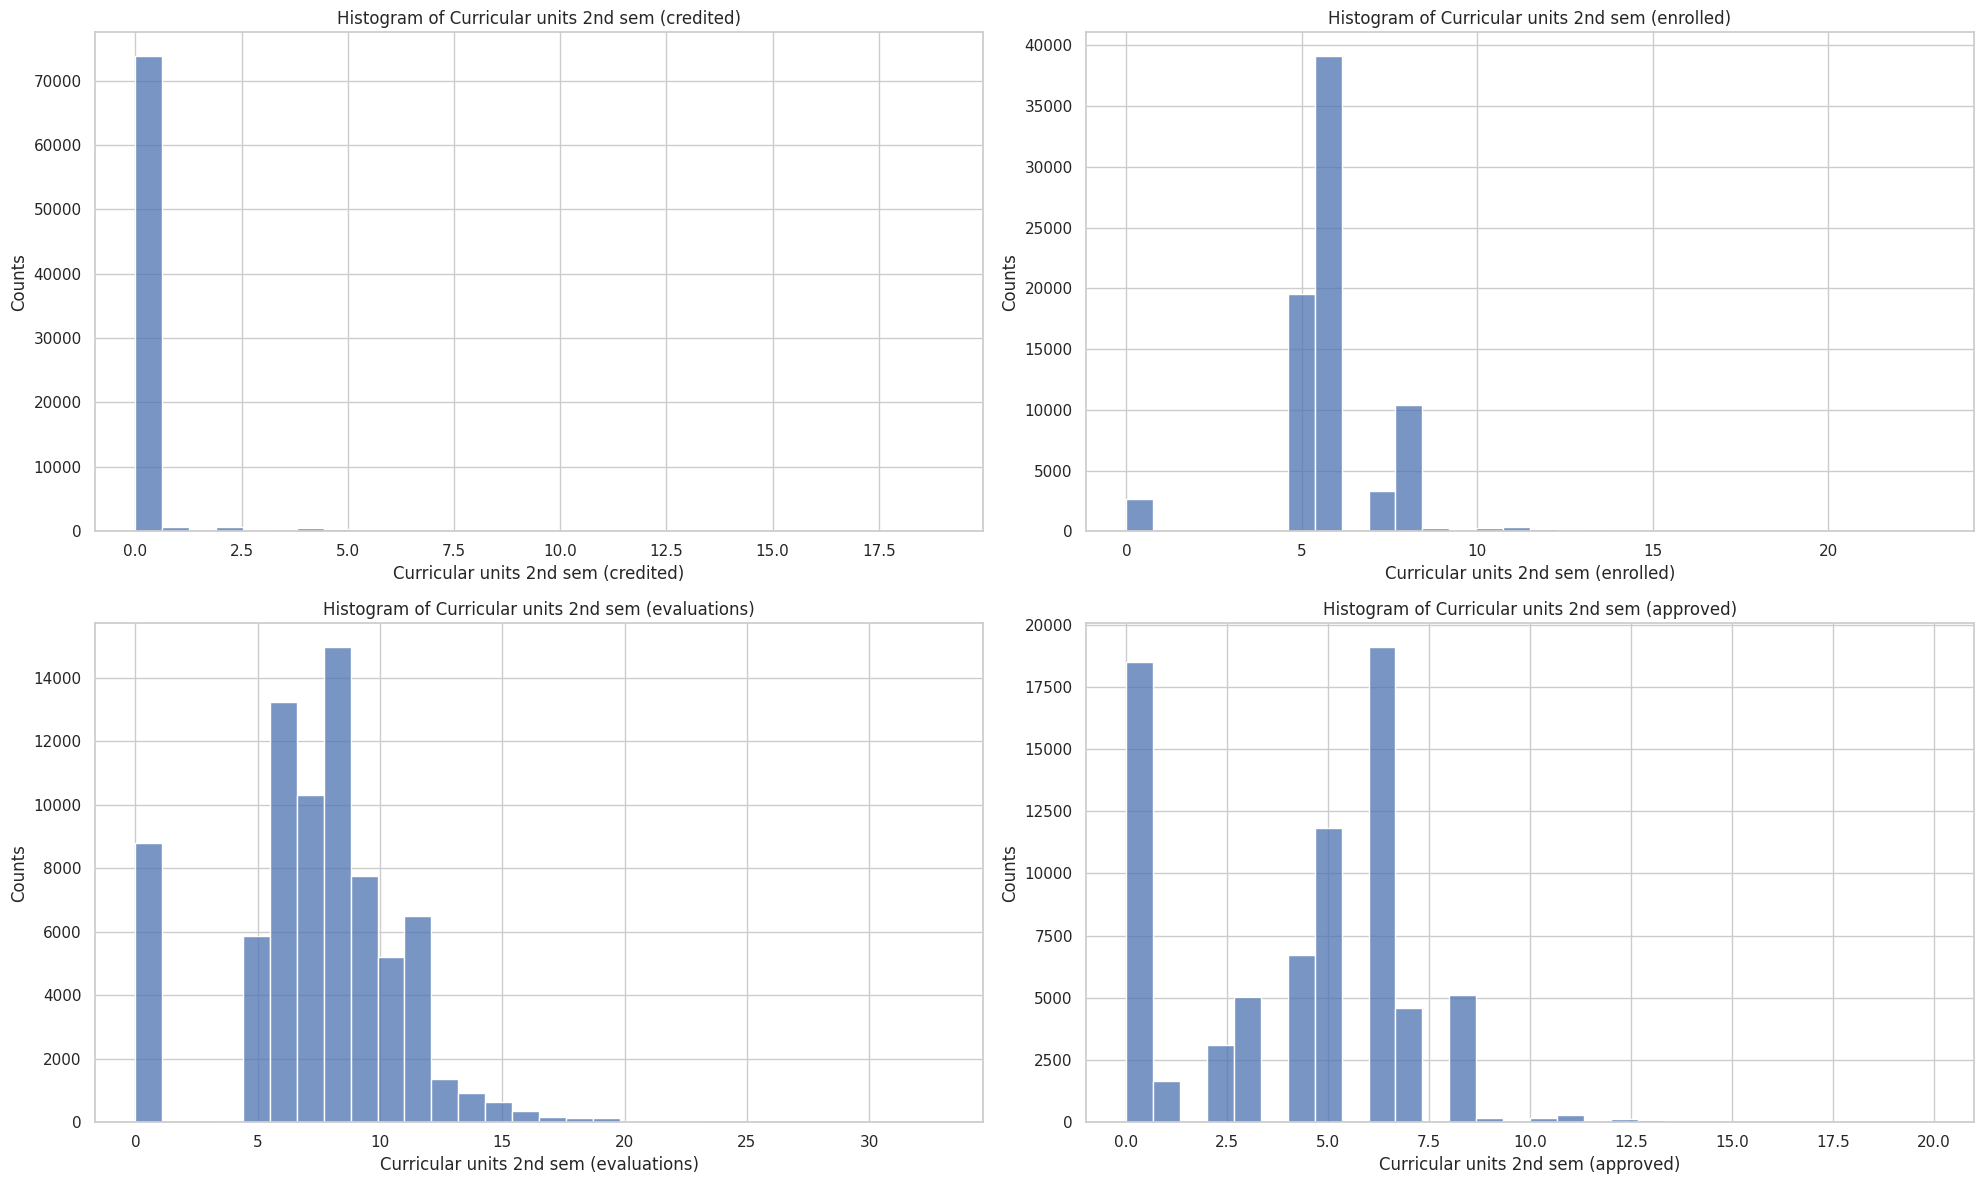

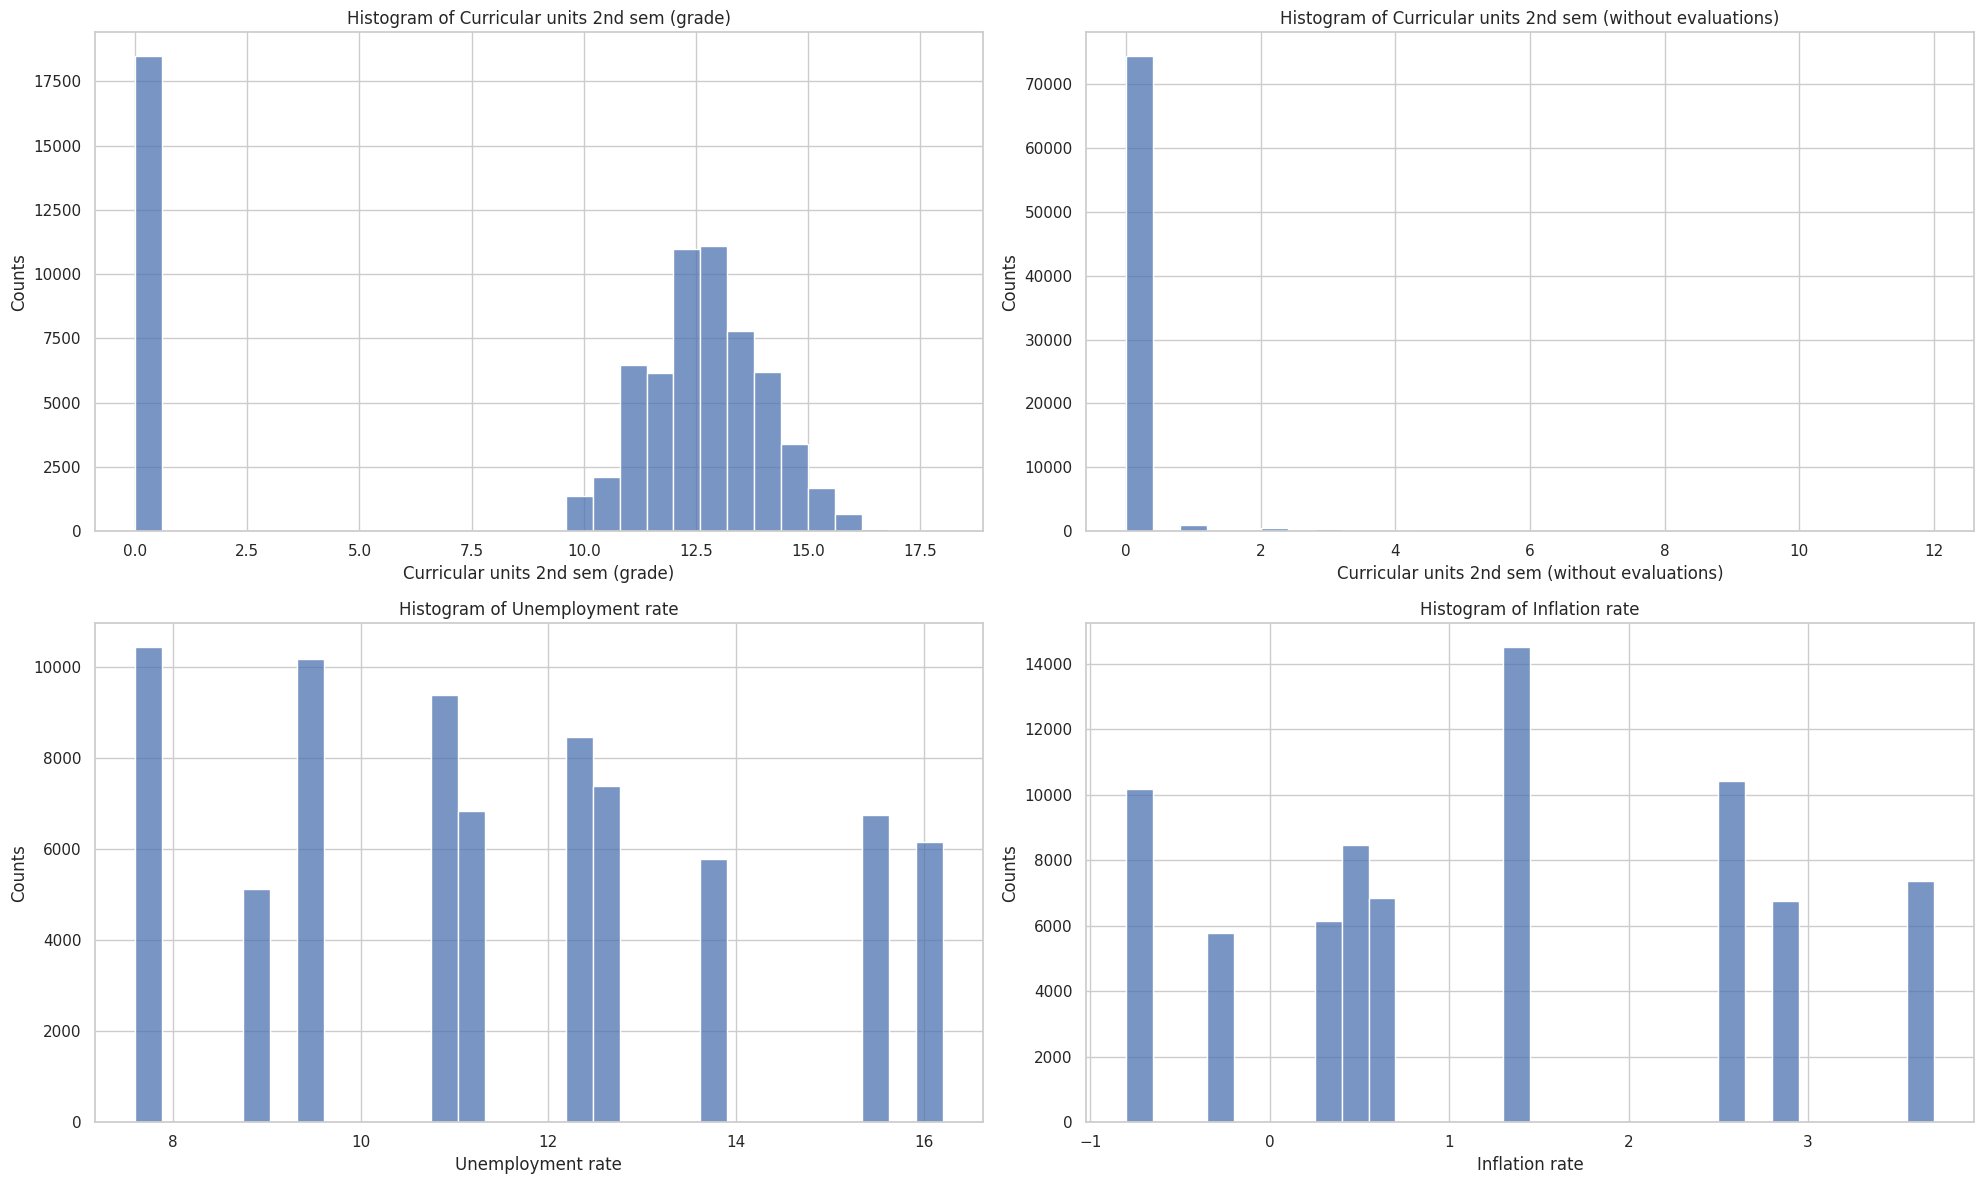

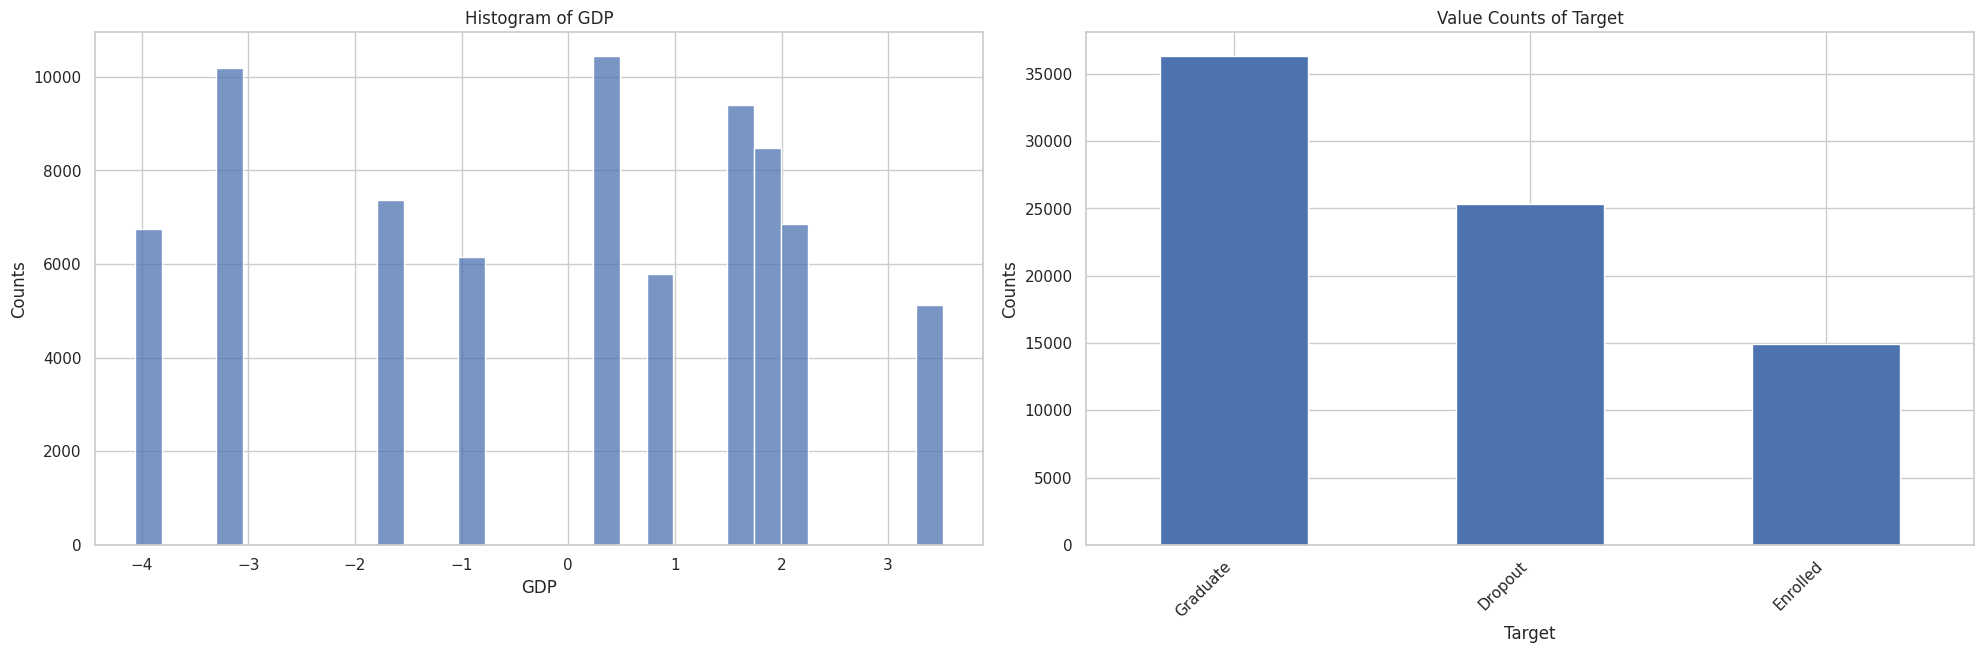

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


total_columns = len(train.columns)


columns_per_plot = 4


for i in range(0, total_columns, columns_per_plot):

    current_columns = train.columns[i:i + columns_per_plot]
    

    plt.figure(figsize=(20, 12))
    
    for j, column in enumerate(current_columns):
        plt.subplot(2, 2, j + 1)  # 2x2 그리드의 위치 지정
        if train[column].dtype == 'object':
            value_counts = train[column].value_counts()
            value_counts.plot(kind='bar')
            plt.title(f'Value Counts of {column}')
            plt.xlabel(column)
            plt.ylabel('Counts')
            plt.xticks(rotation=45, ha='right')
        else:
            sns.histplot(train[column].dropna(), kde=False, bins=30)
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Counts')
    

    plt.tight_layout()
    plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder

categories = ['dropout', 'enrolled', 'graduate']
label_encoder = LabelEncoder()

train['Target'] = label_encoder.fit_transform(train['Target'])

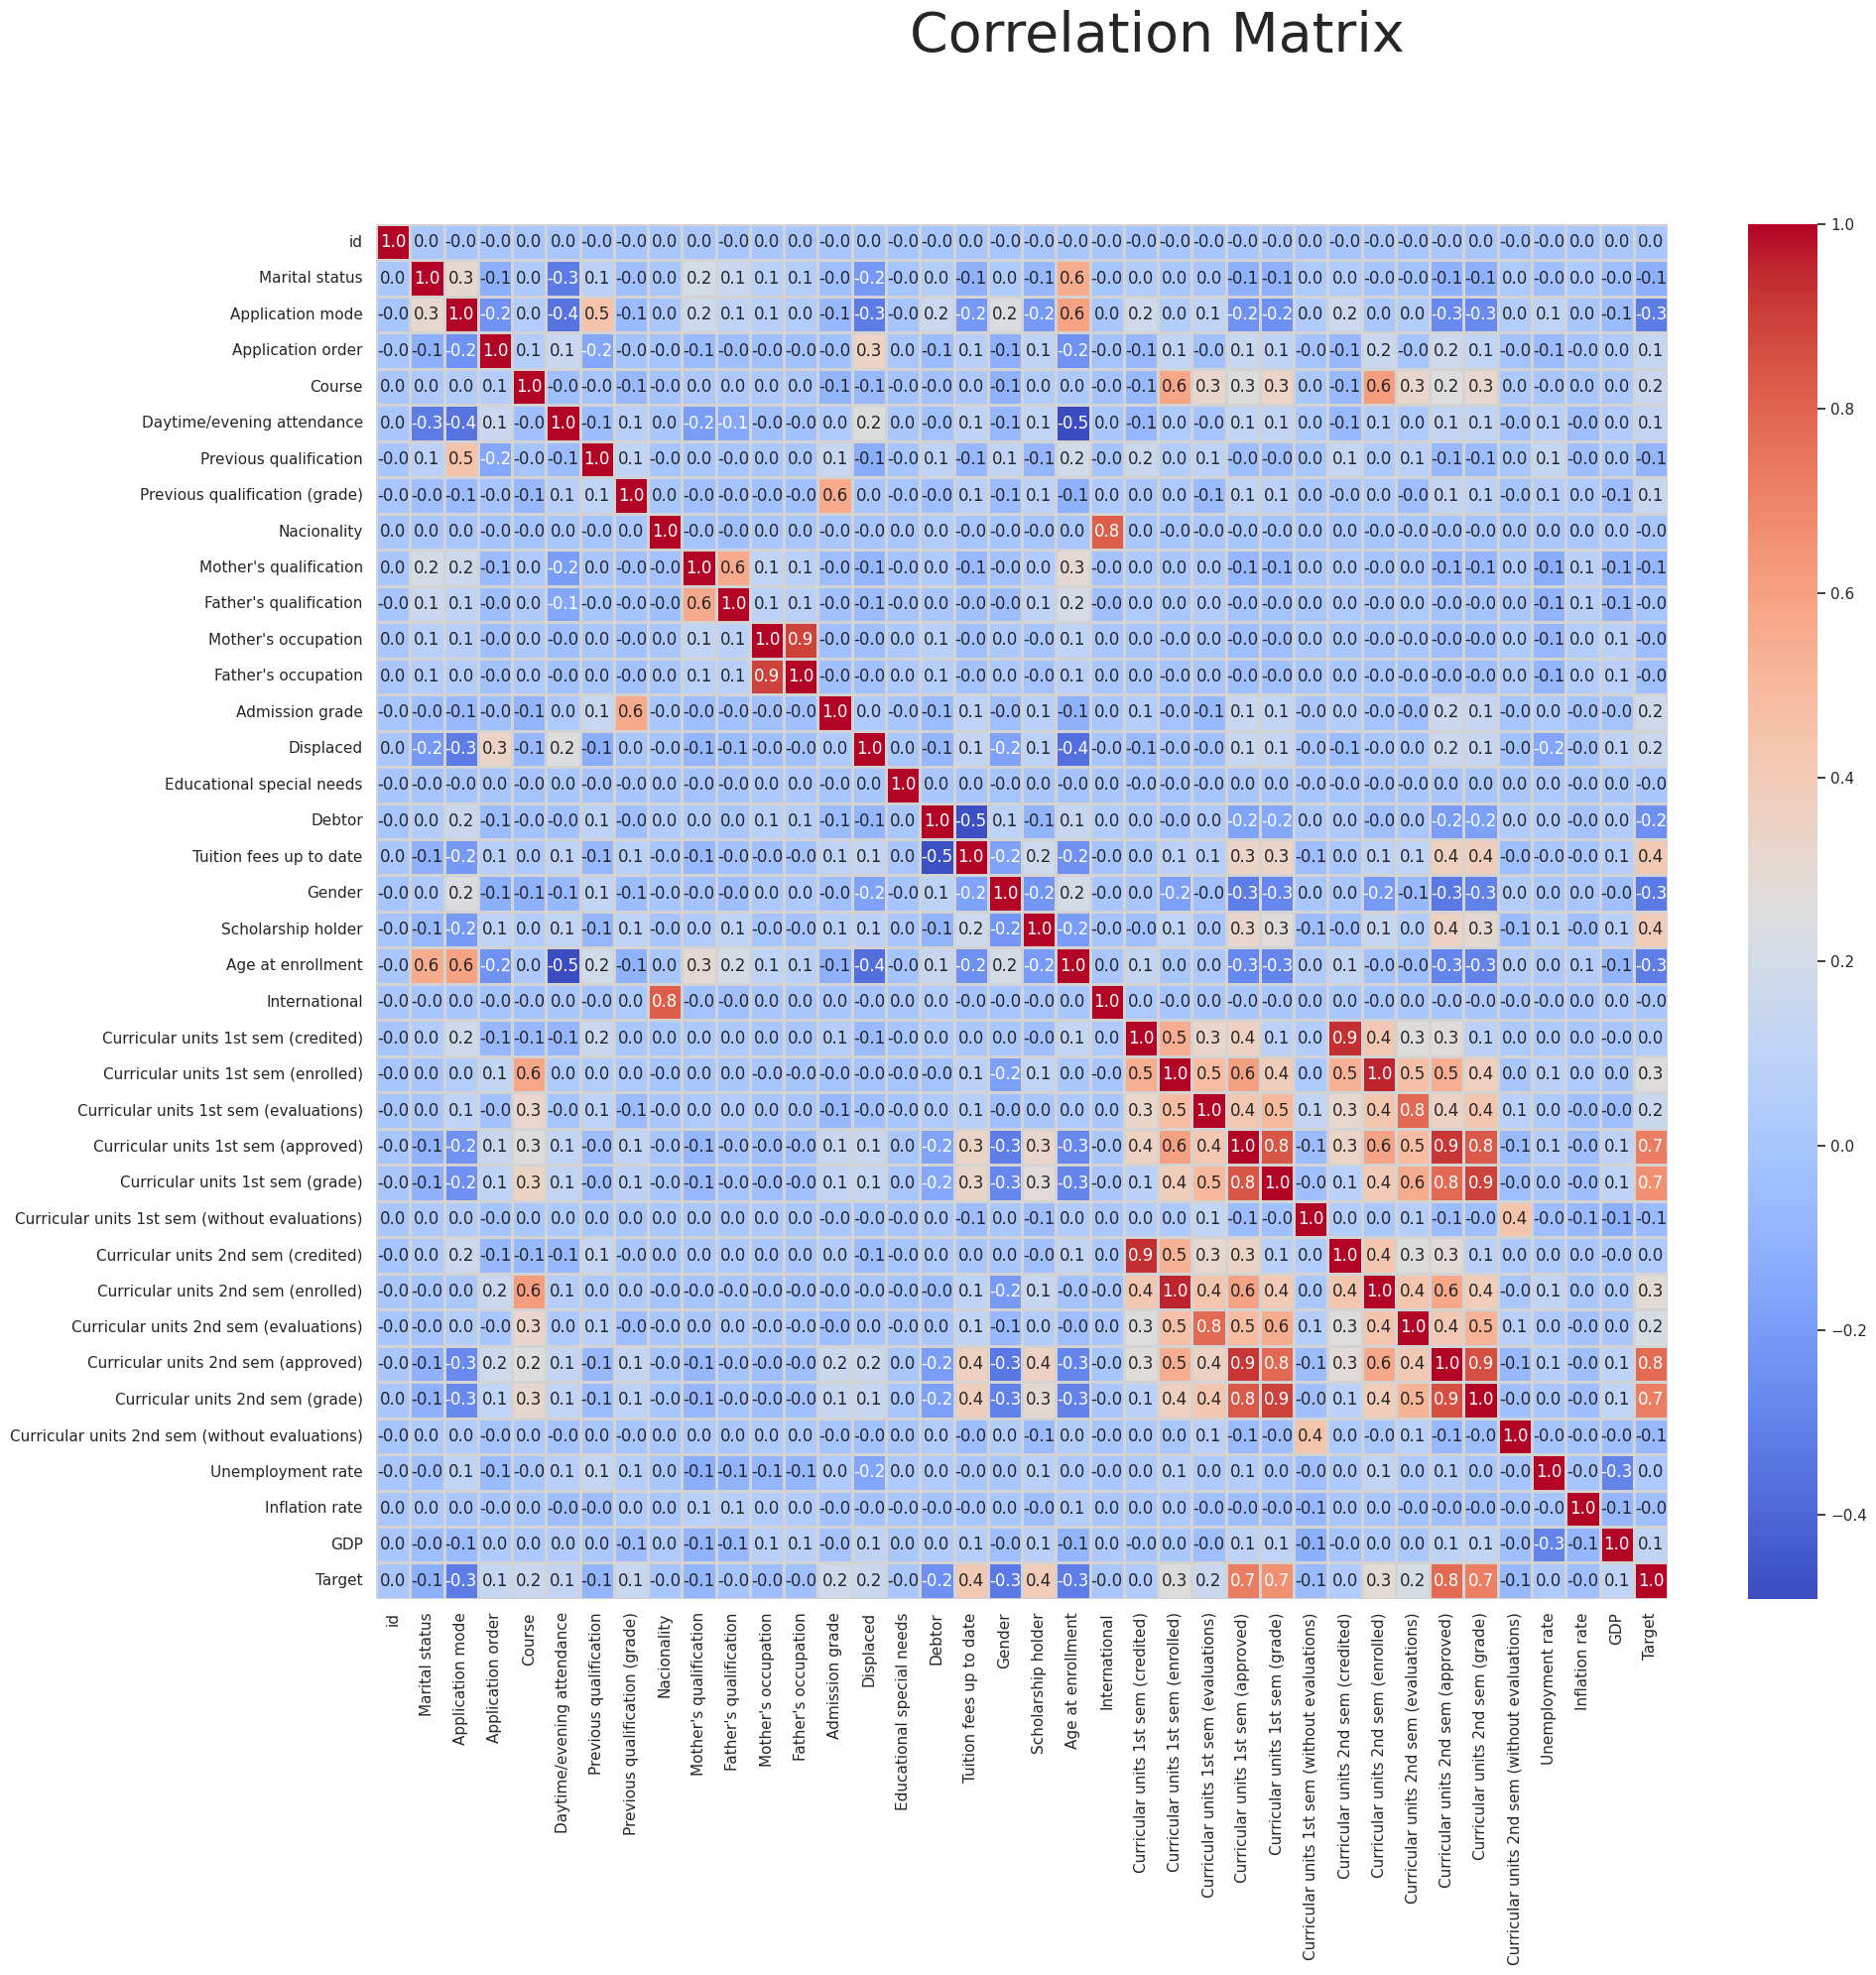

In [9]:
plt.figure(figsize=(21, 18))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

In [10]:
train.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [11]:
# pd.set_option('display.max_rows', None)  
# pd.set_option('display.max_columns', None) 

In [12]:
print(train.corr())

                                                      id  Marital status  \
id                                              1.000000        0.009796   
Marital status                                  0.009796        1.000000   
Application mode                               -0.003956        0.307324   
Application order                              -0.007129       -0.113951   
Course                                          0.002111        0.023141   
Daytime/evening attendance                      0.002192       -0.323587   
Previous qualification                         -0.005403        0.084064   
Previous qualification (grade)                 -0.003635       -0.037717   
Nacionality                                     0.002437        0.004660   
Mother's qualification                          0.001159        0.198373   
Father's qualification                         -0.003199        0.144820   
Mother's occupation                             0.007027        0.069695   
Father's occ

In [7]:

X_train = train.drop(['id', 'Target'], axis=1)

y_train = train['Target']

X_test = test.drop(['id'], axis=1)

# model

In [6]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [27]:
X_train = train.drop(['id', 'Target'], axis=1)

y_train = train['Target']

X_test = test.drop(['id'], axis=1)

In [14]:
matrix = {
    'Feature': ['Marital status', 'Application mode', 'Application order', 'Course',
                'Daytime/evening attendance', 'Previous qualification',
                'Previous qualification (grade)', 'Nacionality',
                'Mother\'s qualification', 'Father\'s qualification',
                'Mother\'s occupation', 'Father\'s occupation', 'Admission grade',
                'Displaced', 'Educational special needs', 'Debtor',
                'Tuition fees up to date', 'Gender', 'Scholarship holder',
                'Age at enrollment', 'International',
                'Curricular units 1st sem (credited)',
                'Curricular units 1st sem (enrolled)',
                'Curricular units 1st sem (evaluations)',
                'Curricular units 1st sem (approved)',
                'Curricular units 1st sem (grade)',
                'Curricular units 1st sem (without evaluations)',
                'Curricular units 2nd sem (credited)',
                'Curricular units 2nd sem (enrolled)',
                'Curricular units 2nd sem (evaluations)',
                'Curricular units 2nd sem (approved)',
                'Curricular units 2nd sem (grade)',
                'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
                'Inflation rate', 'GDP'],
    'Correlation with Target': [ -0.123093, -0.324830, 0.128394, 0.154208,
                                0.124484, -0.092319, 0.138119, -0.004722,
                                -0.085056, -0.012449, -0.043157, -0.032646, 0.172880,
                                0.150066, -0.000499, -0.248391, 0.415691, -0.330181,
                                0.394124, -0.320679, -0.000326, 0.035764, 0.263657,
                                0.152398, 0.725490, 0.661355, -0.060941, 0.038062,
                                0.289165, 0.214951, 0.781452, 0.719036, -0.072690,
                                0.015731, -0.037344, 0.106462]
}


correlation_df = pd.DataFrame(matrix)

In [15]:
low_correlation_features = correlation_df[abs(correlation_df['Correlation with Target']) < 0.6]['Feature'].tolist()


print(len(low_correlation_features))
print(low_correlation_features)

32
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [16]:
X_train_1 = train[low_correlation_features]

In [17]:
low = correlation_df[abs(correlation_df['Correlation with Target']) > 0.5]['Feature'].tolist()


print(len(low))
print(low)

4
['Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


In [18]:
X_train_2 = train[low]

In [19]:
print(X_train.shape)
print(X_train_1.shape)
print(X_train_2.shape)

(76518, 36)
(76518, 32)
(76518, 4)


In [20]:
X_test_1 = test[low_correlation_features]
X_test_2 = test[low]

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from tqdm import tqdm
import tensorflow.compat.v1 as tf1
import os



def tqdm_wrapper(iterable, **kwargs):
    return tqdm(iterable, **kwargs)


kf = KFold(n_splits=5, shuffle=True, random_state=42)


param_grid = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

best_params = {}
results = {}


for name, config in tqdm_wrapper(param_grid.items(), desc='Model Evaluation'):
    print(f"\nGrid Search for {name}...")
    grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_params[name] = grid_search.best_params_
    results[name] = grid_search.best_score_
    
    print(f"Best parameters for {name}: {best_params[name]}")
    print(f"Best cross-validated accuracy for {name}: {results[name]:.4f}")


print("\nFinal Results:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


print("\nBest Parameters:")
for name, params in best_params.items():
    print(f"{name}: {params}")


2024-06-22 06:03:49.523868: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20169 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:3b:00.0, compute capability: 8.0
Model Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]


Grid Search for KNN...


Model Evaluation:  20%|██        | 1/5 [01:21<05:25, 81.29s/it]

Best parameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best cross-validated accuracy for KNN: 0.7634

Grid Search for Decision Tree...


Model Evaluation:  40%|████      | 2/5 [01:39<02:13, 44.37s/it]

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validated accuracy for Decision Tree: 0.8140

Grid Search for Random Forest...


Model Evaluation:  60%|██████    | 3/5 [25:04<22:10, 665.33s/it]

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validated accuracy for Random Forest: 0.8277

Grid Search for AdaBoost...


Model Evaluation:  80%|████████  | 4/5 [26:18<07:12, 432.22s/it]

Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Best cross-validated accuracy for AdaBoost: 0.8252

Grid Search for Gradient Boosting...


Model Evaluation: 100%|██████████| 5/5 [55:33<00:00, 666.61s/it]

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best cross-validated accuracy for Gradient Boosting: 0.8320

Final Results:
KNN: 0.7634
Decision Tree: 0.8140
Random Forest: 0.8277
AdaBoost: 0.8252
Gradient Boosting: 0.8320

Best Parameters:
KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Random Forest: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from tqdm import tqdm
import tensorflow.compat.v1 as tf1
import os
import joblib



def tqdm_wrapper(iterable, **kwargs):
    return tqdm(iterable, **kwargs)


kf = KFold(n_splits=5, shuffle=True, random_state=42)


param_grid = {
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', tree_method='gpu_hist', predictor='gpu_predictor'),
        'params': {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'max_depth': [3],
            'subsample': [1.0],
            'colsample_bytree': [1.0]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(random_state=42, verbose=0, task_type="GPU"),
        'params': {
            'iterations': [100],
            'learning_rate': [0.1],
            'depth': [3]
        }
    }
}

# 최적의 하이퍼파라미터 저장할 딕셔너리
best_params = {}
results = {}

# joblib 백엔드 변경
with joblib.parallel_backend('threading'):
    # 모델 평가
    for name, config in tqdm_wrapper(param_grid.items(), desc='Model Evaluation'):
        print(f"\nGrid Search for {name}...")
        grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=kf, scoring='accuracy', n_jobs=1)
        grid_search.fit(X_train, y_train)

        best_params[name] = grid_search.best_params_
        results[name] = grid_search.best_score_

        print(f"Best parameters for {name}: {best_params[name]}")
        print(f"Best cross-validated accuracy for {name}: {results[name]:.4f}")

# 최종 결과 출력
print("\nFinal Results:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

# 최적의 하이퍼파라미터 출력
print("\nBest Parameters:")
for name, params in best_params.items():
    print(f"{name}: {params}")


2024-06-22 07:48:56.306263: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20169 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:3b:00.0, compute capability: 8.0
Model Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]


Grid Search for XGBoost...


Model Evaluation:  50%|█████     | 1/2 [00:06<00:06,  6.20s/it]

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validated accuracy for XGBoost: 0.8258

Grid Search for CatBoost...


Model Evaluation: 100%|██████████| 2/2 [00:16<00:00,  8.05s/it]

Best parameters for CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}
Best cross-validated accuracy for CatBoost: 0.8223

Final Results:
XGBoost: 0.8258
CatBoost: 0.8223

Best Parameters:
XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from tqdm import tqdm
import tensorflow.compat.v1 as tf1
import os
import joblib

# TensorFlow GPU 설정
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # 사용할 GPU 장치 설정
config = tf1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5  # GPU 메모리 사용량 조절
session = tf1.Session(config=config)

# TQDM ProgressBar로 감싸는 함수 정의
def tqdm_wrapper(iterable, **kwargs):
    return tqdm(iterable, **kwargs)

# K-Fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델과 하이퍼파라미터 그리드 설정
param_grid = {
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', tree_method='gpu_hist', predictor='gpu_predictor'),
        'params': {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'max_depth': [3],
            'subsample': [1.0],
            'colsample_bytree': [1.0]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(random_state=42, verbose=0, task_type="GPU"),
        'params': {
            'iterations': [100],
            'learning_rate': [0.1],
            'depth': [3]
        }
    },
    'LightGBM': {
        'model': lgb.LGBMClassifier(random_state=42, device_type='cpu'),
        'params': {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'num_leaves': [31],
            'max_depth': [10]
        }
    }
}

# 최적의 하이퍼파라미터 저장할 딕셔너리
best_params = {}
results = {}

# joblib 백엔드 변경
with joblib.parallel_backend('threading'):
    # 모델 평가
    for name, config in tqdm_wrapper(param_grid.items(), desc='Model Evaluation'):
        print(f"\nGrid Search for {name}...")
        grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=kf, scoring='accuracy', n_jobs=1)
        grid_search.fit(X_train, y_train)

        best_params[name] = grid_search.best_params_
        results[name] = grid_search.best_score_

        print(f"Best parameters for {name}: {best_params[name]}")
        print(f"Best cross-validated accuracy for {name}: {results[name]:.4f}")

# 최종 결과 출력
print("\nFinal Results:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

# 최적의 하이퍼파라미터 출력
print("\nBest Parameters:")
for name, params in best_params.items():
    print(f"{name}: {params}")


2024-06-22 08:49:06.683353: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20169 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:3b:00.0, compute capability: 8.0
Model Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]


Grid Search for XGBoost...


Model Evaluation:  33%|███▎      | 1/3 [00:26<00:52, 26.10s/it]

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validated accuracy for XGBoost: 0.8258

Grid Search for CatBoost...


Model Evaluation:  67%|██████▋   | 2/3 [01:09<00:36, 36.21s/it]

Best parameters for CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}
Best cross-validated accuracy for CatBoost: 0.8223

Grid Search for LightGBM...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.241153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1374
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 36
[LightGBM] [Info] Start training from score -1.105333
[LightGBM] [Info] Start training from score -1.635907
[LightGBM] [Info] Start training fr

Model Evaluation: 100%|██████████| 3/3 [2:11:04<00:00, 2621.58s/it]

Best parameters for LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}
Best cross-validated accuracy for LightGBM: 0.8313

Final Results:
XGBoost: 0.8258
CatBoost: 0.8223
LightGBM: 0.8313

Best Parameters:
XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}
LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}


## Best Parameters:
- KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
- Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
- Random Forest: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
- AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
- Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
- XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
- CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}
- LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}



In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
import tensorflow.compat.v1 as tf1
import os


# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 최적의 하이퍼파라미터를 반영한 모델 초기화
models = {
   }

# Voting Classifier 구성
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='soft'  # soft voting
)

# Voting Classifier 학습
voting_clf.fit(X_train, y_train)

# Voting Classifier 평가
ensemble_accuracy = voting_clf.score(X_test, y_test)

print("\nEnsemble Model Accuracy: {:.4f}".format(ensemble_accuracy))

# 최종 결과 출력
print("\nFinal Results:")
for name, model in models.items():
    print(f"{name}: {model.get_params()}")


2024-06-22 08:26:10.078660: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20169 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:3b:00.0, compute capability: 8.0


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.238866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1360
[LightGBM] [Info] Number of data points in the train set: 48971, number of used features: 36
[LightGBM] [Info] Start training from score -1.109184
[LightGBM] [Info] Start training from score -1.633641
[LightGBM] [Info] Start training from score -0.744536
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Ensemble Model

In [27]:
X_test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9500,1,1,141.0,1,3,1,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,1,1,1,9238,1,1,128.0,1,1,19,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,1,1,1,9238,1,1,118.0,1,1,19,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,1,44,1,9147,1,39,130.0,1,1,19,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,1,39,1,9670,1,1,110.0,1,1,37,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,1,1,2,171,1,1,128.0,1,38,37,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,2,39,1,9119,1,19,133.1,1,19,37,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,1,1,1,171,1,1,127.0,1,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,1,1,3,9773,1,1,132.0,1,19,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [28]:
y_pred = voting_clf.predict(X_test)  # 클래스 예측
y_pred_proba = voting_clf.predict_proba(X_test)  # 클래스별 확률 예측

# 예측 결과 출력
print("\nPredicted Classes for X_test:")
print(y_pred)

print("\nPredicted Probabilities for X_test:")
print(y_pred_proba)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Predicted Classes for X_test:
[0 2 2 ... 0 0 0]

Predicted Probabilities for X_test:
[[0.90548661 0.05083395 0.04367944]
 [0.05276102 0.0748748  0.87236418]
 [0.10441857 0.26046852 0.63511291]
 ...
 [0.83280002 0.07829942 0.08890056]
 [0.73185885 0.13702413 0.13111702]
 [0.89375544 0.05218971 0.05405484]]


In [40]:
submit['Target']= y_pred
submit

,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,2
4,76522,1
...,...,...
51007,127525,0
51008,127526,0
51009,127527,0
51010,127528,0


In [43]:
submit['Target'] = label_encoder.inverse_transform(submit['Target'])

In [45]:
submit.to_csv('v1.csv',index = False, quoting = 3)
submit.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


제출 스코어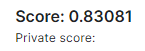

# FCNN

In [30]:
X_train = train.drop(['id', 'Target'], axis=1)

y_train = train['Target']

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(X_train.shape)  
print(y_train.shape)  


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(32, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(3, activation='softmax')) 


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, 
                    callbacks=[early_stopping], verbose=1)


loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
print(f'Predicted classes: {y_pred_classes}')

(61214, 36)
(61214,)


/home/a202192006/.local/lib/python3.8/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
1531/1531 [==============================] - 15s 8ms/step - loss: 0.6444 - accuracy: 0.7467 - val_loss: 0.4921 - val_accuracy: 0.8072
Epoch 2/100
1531/1531 [==============================] - 12s 8ms/step - loss: 0.5434 - accuracy: 0.7971 - val_loss: 0.4789 - val_accuracy: 0.8117
Epoch 3/100
1531/1531 [==============================] - 12s 8ms/step - loss: 0.5258 - accuracy: 0.8041 - val_loss: 0.4694 - val_accuracy: 0.8157
Epoch 4/100
1531/1531 [==============================] - 13s 9ms/step - loss: 0.5165 - accuracy: 0.8078 - val_loss: 0.4664 - val_accuracy: 0.8188
Epoch 5/100
1531/1531 [==============================] - 12s 8ms/step - loss: 0.5122 - accuracy: 0.8090 - val_loss: 0.4658 - val_accuracy: 0.8183
Epoch 6/100
1531/1531 [==============================] - 12s 8ms/step - loss: 0.5068 - accuracy: 0.8115 - val_loss: 0.4651 - val_accuracy: 0.8174
Epoch 7/100
1531/1531 [==============================] - 11s 7ms/step - loss: 0.5047 - accuracy: 0.8118 - val_loss: 0.4632 -

In [40]:
test = pd.read_csv(path + 'test.csv')
test = test.drop(['id'], axis=1)

X_test_data = scaler.transform(test)
y_pred = model.predict(X_test_data)
y_pred

In [41]:
y_pred = model.predict(X_test_data)

1595/1595 [==============================] - 6s 3ms/step


In [47]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [48]:
y_pred_classes

array([0, 2, 2, ..., 0, 0, 0])

In [49]:
submit['Target']= y_pred_classes
submit

,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,2
4,76522,1
...,...,...
51007,127525,0
51008,127526,0
51009,127527,0
51010,127528,0


In [50]:
submit['Target'] = label_encoder.inverse_transform(submit['Target'])

In [52]:
submit.to_csv('v2.csv',index = False, quoting = 3)
submit.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


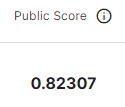

# 데이터 전치리 진행(IQR) - 이상치 삭제 처리 

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = "/home/a202192006/kaggle(캐글)/Classification with an Academic Success Dataset/data/"

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submit = pd.read_csv(path + 'sample_submission.csv')

In [93]:
from sklearn.preprocessing import LabelEncoder

categories = ['dropout', 'enrolled', 'graduate']
label_encoder = LabelEncoder()

train['Target'] = label_encoder.fit_transform(train['Target'])

X_train = train.drop(['id', 'Target'], axis=1)

y_train = train['Target']

test = test.drop(['id'], axis=1)

In [94]:
import numpy as np
import pandas as pd



def iqr_outlier_removal(df, feature, multiplier=1.5):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    print(f"Processing column: {feature}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df_filtered

iqr_multiplier = 3.0


excluded_columns = ['Marital status', 'Daytime/evening attendance', 
                    'Previous qualification', 'Nacionality', 
                    'Mother\'s qualification', 'Father\'s qualification',
                    'Mother\'s occupation', 'Father\'s occupation',
                    'Displaced', 'Educational special needs', 
                    'Debtor', 'Tuition fees up to date', 'Gender', 
                    'Scholarship holder', 'International']

numeric_columns = [col for col in X_train.columns if col not in excluded_columns]

X_train_filtered = X_train.copy()

# 수치형 컬럼의 이상치를 제거하고, 남은 데이터의 인덱스를 추적
for col in numeric_columns:
    X_train_filtered = iqr_outlier_removal(X_train_filtered, col, multiplier=iqr_multiplier)

# 이상치 제거 전후 데이터 크기 확인
print("Before IQR filtering:", X_train.shape)
print("After IQR filtering:", X_train_filtered.shape)

# 남은 데이터의 인덱스를 확인
remaining_indices = X_train_filtered.index

# y_train에서 동일한 인덱스를 유지
y_train_filtered = y_train.loc[remaining_indices]

# 결측치가 존재할 경우 제거 (이상치 제거로 인한 결측치 발생 가능)
X_train_filtered = X_train_filtered.dropna()
y_train_filtered = y_train_filtered.loc[X_train_filtered.index]

# 최종 전처리된 데이터
print("Final filtered data shape (X_train):", X_train_filtered.shape)
print("Final filtered data shape (y_train):", y_train_filtered.shape)


Processing column: Application mode
Q1: 1.0, Q3: 39.0, IQR: 38.0, Lower bound: -113.0, Upper bound: 153.0
Processing column: Application order
Q1: 1.0, Q3: 2.0, IQR: 1.0, Lower bound: -2.0, Upper bound: 5.0
Processing column: Course
Q1: 9119.0, Q3: 9670.0, IQR: 551.0, Lower bound: 7466.0, Upper bound: 11323.0
Processing column: Previous qualification (grade)
Q1: 125.0, Q3: 139.0, IQR: 14.0, Lower bound: 83.0, Upper bound: 181.0
Processing column: Admission grade
Q1: 117.8, Q3: 131.7, IQR: 13.899999999999991, Lower bound: 76.10000000000002, Upper bound: 173.39999999999998
Processing column: Age at enrollment
Q1: 18.0, Q3: 23.0, IQR: 5.0, Lower bound: 3.0, Upper bound: 38.0
Processing column: Curricular units 1st sem (credited)
Q1: 0.0, Q3: 0.0, IQR: 0.0, Lower bound: 0.0, Upper bound: 0.0
Processing column: Curricular units 1st sem (enrolled)
Q1: 5.0, Q3: 6.0, IQR: 1.0, Lower bound: 2.0, Upper bound: 9.0
Processing column: Curricular units 1st sem (evaluations)
Q1: 6.0, Q3: 9.0, IQR: 3.

In [95]:
X_train_filtered
y_train_filtered

0        2
7        2
12       1
15       2
17       0
        ..
76510    2
76511    2
76512    2
76513    2
76517    2
Name: Target, Length: 28267, dtype: int64

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


X_train, X_test, y_train, y_test = train_test_split(X_train_filtered, y_train_filtered, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape) 
print(y_train.shape) 

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu')) 
model.add(Dropout(0.5))  
model.add(Dense(3, activation='softmax')) 

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, 
                    callbacks=[early_stopping], verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # 확률이 가장 높은 클래스를 선택
print(f'Predicted classes: {y_pred_classes}')

(22613, 36)
(22613,)


/home/a202192006/.local/lib/python3.8/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
566/566 [==============================] - 10s 13ms/step - loss: 0.7290 - accuracy: 0.7069 - val_loss: 0.5654 - val_accuracy: 0.7785
Epoch 2/100
566/566 [==============================] - 7s 13ms/step - loss: 0.6092 - accuracy: 0.7579 - val_loss: 0.5519 - val_accuracy: 0.7851
Epoch 3/100
566/566 [==============================] - 7s 13ms/step - loss: 0.5858 - accuracy: 0.7698 - val_loss: 0.5372 - val_accuracy: 0.7913
Epoch 4/100
566/566 [==============================] - 8s 13ms/step - loss: 0.5745 - accuracy: 0.7728 - val_loss: 0.5321 - val_accuracy: 0.7906
Epoch 5/100
566/566 [==============================] - 8s 13ms/step - loss: 0.5664 - accuracy: 0.7773 - val_loss: 0.5313 - val_accuracy: 0.7942
Epoch 6/100
566/566 [==============================] - 8s 13ms/step - loss: 0.5632 - accuracy: 0.7775 - val_loss: 0.5280 - val_accuracy: 0.7924
Epoch 7/100
566/566 [==============================] - 7s 12ms/step - loss: 0.5555 - accuracy: 0.7811 - val_loss: 0.5261 - val_accuracy

In [97]:
test = pd.read_csv(path + 'test.csv')
test = test.drop(['id'], axis=1)

X_test_data = scaler.transform(test)
y_pred = model.predict(X_test_data)
y_pred

1595/1595 [==============================] - 6s 4ms/step


array([[9.8217851e-01, 1.7821493e-02, 2.9452902e-09],
       [8.2469340e-03, 1.7596645e-02, 9.7415644e-01],
       [5.7201117e-02, 2.8828928e-01, 6.5450966e-01],
       ...,
       [7.7577078e-01, 2.2045524e-01, 3.7739817e-03],
       [8.3651173e-01, 1.6282919e-01, 6.5917894e-04],
       [6.8797225e-01, 3.0448827e-01, 7.5394274e-03]], dtype=float32)

In [98]:
y_pred = model.predict(X_test_data)

1595/1595 [==============================] - 6s 4ms/step


In [99]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [100]:
y_pred_classes

array([0, 2, 2, ..., 0, 0, 0])

In [101]:
submit['Target']= y_pred_classes
submit

,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,2
4,76522,1
...,...,...
51007,127525,0
51008,127526,0
51009,127527,0
51010,127528,0


In [102]:
submit['Target'] = label_encoder.inverse_transform(submit['Target'])

In [104]:
submit.to_csv('v3.csv',index = False, quoting = 3)
submit.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


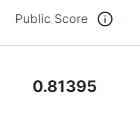

# 앙상블

In [ ]:
X_train_filtered
y_train_filtered

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from tqdm import tqdm
import tensorflow.compat.v1 as tf1
import os


def tqdm_wrapper(iterable, **kwargs):
    return tqdm(iterable, **kwargs)

# K-Fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델과 하이퍼파라미터 그리드 설정
param_grid = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

# 최적의 하이퍼파라미터 저장할 딕셔너리
best_params = {}
results = {}

# 모델 평가
for name, config in tqdm_wrapper(param_grid.items(), desc='Model Evaluation'):
    print(f"\nGrid Search for {name}...")
    grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_filtered, y_train_filtered)
    
    best_params[name] = grid_search.best_params_
    results[name] = grid_search.best_score_
    
    print(f"Best parameters for {name}: {best_params[name]}")
    print(f"Best cross-validated accuracy for {name}: {results[name]:.4f}")

# 최종 결과 출력
print("\nFinal Results:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

# 최적의 하이퍼파라미터 출력
print("\nBest Parameters:")
for name, params in best_params.items():
    print(f"{name}: {params}")


Model Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]


Grid Search for KNN...


Model Evaluation:  20%|██        | 1/5 [00:23<01:32, 23.18s/it]

Best parameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best cross-validated accuracy for KNN: 0.7235

Grid Search for Decision Tree...


Model Evaluation:  40%|████      | 2/5 [00:31<00:43, 14.57s/it]

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validated accuracy for Decision Tree: 0.7789

Grid Search for Random Forest...


Model Evaluation:  60%|██████    | 3/5 [09:20<08:19, 249.51s/it]

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validated accuracy for Random Forest: 0.8002

Grid Search for AdaBoost...


Model Evaluation:  80%|████████  | 4/5 [09:41<02:39, 159.22s/it]

Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Best cross-validated accuracy for AdaBoost: 0.7970

Grid Search for Gradient Boosting...


Model Evaluation: 100%|██████████| 5/5 [17:13<00:00, 206.70s/it]

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best cross-validated accuracy for Gradient Boosting: 0.8033

Final Results:
KNN: 0.7235
Decision Tree: 0.7789
Random Forest: 0.8002
AdaBoost: 0.7970
Gradient Boosting: 0.8033

Best Parameters:
KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from tqdm import tqdm
import tensorflow.compat.v1 as tf1
import os
import joblib

# TensorFlow GPU 설정
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # 사용할 GPU 장치 설정
config = tf1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5  # GPU 메모리 사용량 조절
session = tf1.Session(config=config)

# TQDM ProgressBar로 감싸는 함수 정의
def tqdm_wrapper(iterable, **kwargs):
    return tqdm(iterable, **kwargs)

# K-Fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델과 하이퍼파라미터 그리드 설정
param_grid = {
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', tree_method='gpu_hist', predictor='gpu_predictor'),
        'params': {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'max_depth': [3],
            'subsample': [1.0],
            'colsample_bytree': [1.0]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(random_state=42, verbose=0, task_type="GPU"),
        'params': {
            'iterations': [100],
            'learning_rate': [0.1],
            'depth': [3]
        }
    },
    'LightGBM': {
        'model': lgb.LGBMClassifier(random_state=42, device_type='cpu'),
        'params': {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'num_leaves': [31],
            'max_depth': [10]
        }
    }
}

# 최적의 하이퍼파라미터 저장할 딕셔너리
best_params = {}
results = {}

# joblib 백엔드 변경
with joblib.parallel_backend('threading'):
    # 모델 평가
    for name, config in tqdm_wrapper(param_grid.items(), desc='Model Evaluation'):
        print(f"\nGrid Search for {name}...")
        grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=kf, scoring='accuracy', n_jobs=1)
        grid_search.fit(X_train_filtered, y_train_filtered)

        best_params[name] = grid_search.best_params_
        results[name] = grid_search.best_score_

        print(f"Best parameters for {name}: {best_params[name]}")
        print(f"Best cross-validated accuracy for {name}: {results[name]:.4f}")

# 최종 결과 출력
print("\nFinal Results:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

# 최적의 하이퍼파라미터 출력
print("\nBest Parameters:")
for name, params in best_params.items():
    print(f"{name}: {params}")


2024-06-24 06:30:49.034339: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20169 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:86:00.0, compute capability: 8.0
Model Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]


Grid Search for XGBoost...


Model Evaluation:  33%|███▎      | 1/3 [00:07<00:14,  7.40s/it]

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validated accuracy for XGBoost: 0.7998

Grid Search for CatBoost...


Model Evaluation:  67%|██████▋   | 2/3 [00:22<00:11, 11.95s/it]

Best parameters for CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}
Best cross-validated accuracy for CatBoost: 0.7990

Grid Search for LightGBM...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.315720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 22613, number of used features: 31
[LightGBM] [Info] Start training from score -2.068053
[LightGBM] [Info] Start training from score -1.517119
[LightGBM] [Info] Start training fro

Model Evaluation: 100%|██████████| 3/3 [1:07:33<00:00, 1351.09s/it]

Best parameters for LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}
Best cross-validated accuracy for LightGBM: 0.8036

Final Results:
XGBoost: 0.7998
CatBoost: 0.7990
LightGBM: 0.8036

Best Parameters:
XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}
LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}


## Best Parameters:
- KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
- Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
- Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
- AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
- Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
- XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
- CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}
- LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb


X_train, X_test, y_train, y_test = train_test_split(X_train_filtered, y_train_filtered, test_size=0.2, random_state=42)


models = {
    'KNN': KNeighborsClassifier(n_neighbors=7, p=1, weights='distance'),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=4, min_samples_split=10),
    'Random Forest': RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300),
    'AdaBoost': AdaBoostClassifier(learning_rate=1, n_estimators=200),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=300),
    'XGBoost': xgb.XGBClassifier(colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0),
    'CatBoost': CatBoostClassifier(depth=3, iterations=100, learning_rate=0.1, verbose=False),
    'LightGBM': lgb.LGBMClassifier(learning_rate=0.1, max_depth=10, n_estimators=100, num_leaves=31)
}


voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='soft'  # soft voting
)


voting_clf.fit(X_train, y_train)


ensemble_accuracy = voting_clf.score(X_test, y_test)

print("\nEnsemble Model Accuracy: {:.4f}".format(ensemble_accuracy))


print("\nFinal Results:")
for name, model in models.items():
    print(f"{name}: {model.get_params()}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.349002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 22613, number of used features: 31
[LightGBM] [Info] Start training from score -2.068053
[LightGBM] [Info] Start training from score -1.517119
[LightGBM] [Info] Start training from score -0.424303
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Ensemble Model 

In [108]:
submit = pd.read_csv(path + 'sample_submission.csv')


y_pred = voting_clf.predict(test)
y_pred_proba = voting_clf.predict_proba(test)  


print("\nPredicted Classes for X_test:")
print(y_pred)

print("\nPredicted Probabilities for X_test:")
print(y_pred_proba)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Predicted Classes for X_test:
[0 2 2 ... 0 0 0]

Predicted Probabilities for X_test:
[[0.75803676 0.09305187 0.14891138]
 [0.04774683 0.06728185 0.88497133]
 [0.10489036 0.25410074 0.6410089 ]
 ...
 [0.78741481 0.07503076 0.13755444]
 [0.69289395 0.13844709 0.16865897]
 [0.73141496 0.10835919 0.16022585]]


In [109]:
submit['Target']= y_pred
submit

,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,2
4,76522,1
...,...,...
51007,127525,0
51008,127526,0
51009,127527,0
51010,127528,0


In [110]:
submit['Target'] = label_encoder.inverse_transform(submit['Target'])

In [111]:
submit.to_csv('v5.csv',index = False, quoting = 3)
submit.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


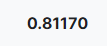

# IQR 중앙값으로 대체 (FCNN, 앙상블)

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = "/home/a202192006/kaggle(캐글)/Classification with an Academic Success Dataset/data/"

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submit = pd.read_csv(path + 'sample_submission.csv')

In [129]:
from sklearn.preprocessing import LabelEncoder

categories = ['dropout', 'enrolled', 'graduate']
label_encoder = LabelEncoder()

train['Target'] = label_encoder.fit_transform(train['Target'])

X_train = train.drop(['id', 'Target'], axis=1)

y_train = train['Target']

test = test.drop(['id'], axis=1)

In [130]:
import pandas as pd
import numpy as np




def replace_outliers_with_median(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df[col].median()
        
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])

    return df


X_train_cleaned = replace_outliers_with_median(X_train.copy(), X_train.columns)
test_cleaned = replace_outliers_with_median(test.copy(), test.columns)

In [115]:
X_train_cleaned

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1.0,1.0,1.0,9238.0,1.0,1.0,126.0,1.0,1.0,19.0,...,0.0,0.0,6.0,7.0,6.0,12.428571,0.0,11.1,0.6,2.02
1,1.0,17.0,1.0,9238.0,1.0,1.0,125.0,1.0,19.0,19.0,...,0.0,0.0,6.0,9.0,0.0,12.142857,0.0,11.1,0.6,2.02
2,1.0,17.0,2.0,9254.0,1.0,1.0,137.0,1.0,3.0,19.0,...,0.0,0.0,6.0,7.0,0.0,12.142857,0.0,16.2,0.3,-0.92
3,1.0,1.0,3.0,9500.0,1.0,1.0,131.0,1.0,19.0,3.0,...,0.0,0.0,6.0,11.0,7.0,12.820000,0.0,11.1,0.6,2.02
4,1.0,1.0,2.0,9500.0,1.0,1.0,132.0,1.0,19.0,37.0,...,0.0,0.0,7.0,12.0,6.0,12.933333,0.0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1.0,17.0,1.0,9254.0,1.0,1.0,121.0,1.0,19.0,1.0,...,0.0,0.0,6.0,8.0,5.0,10.600000,0.0,13.9,-0.3,0.79
76514,1.0,1.0,1.0,9254.0,1.0,1.0,125.0,1.0,1.0,38.0,...,0.0,0.0,6.0,9.0,6.0,13.875000,0.0,9.4,-0.8,-3.12
76515,1.0,17.0,1.0,9085.0,1.0,1.0,138.0,1.0,37.0,37.0,...,0.0,0.0,5.0,8.0,5.0,11.400000,0.0,9.4,-0.8,-3.12
76516,1.0,1.0,3.0,9070.0,1.0,1.0,136.0,1.0,38.0,37.0,...,0.0,0.0,6.0,7.0,0.0,12.142857,0.0,7.6,2.6,0.32


In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


X_train, X_test, y_train, y_test = train_test_split(X_train_cleaned, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape) 
print(y_train.shape) 

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu')) 
model.add(Dropout(0.5))  
model.add(Dense(3, activation='softmax')) 

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, 
                    callbacks=[early_stopping], verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # 확률이 가장 높은 클래스를 선택
print(f'Predicted classes: {y_pred_classes}')

(61214, 36)
(61214,)


/home/a202192006/.local/lib/python3.8/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
1531/1531 [==============================] - 22s 13ms/step - loss: 0.6712 - accuracy: 0.7359 - val_loss: 0.5384 - val_accuracy: 0.7889
Epoch 2/100
1531/1531 [==============================] - 20s 13ms/step - loss: 0.5857 - accuracy: 0.7825 - val_loss: 0.5233 - val_accuracy: 0.7952
Epoch 3/100
1531/1531 [==============================] - 19s 13ms/step - loss: 0.5742 - accuracy: 0.7875 - val_loss: 0.5142 - val_accuracy: 0.7999
Epoch 4/100
1531/1531 [==============================] - 20s 13ms/step - loss: 0.5633 - accuracy: 0.7931 - val_loss: 0.5137 - val_accuracy: 0.7994
Epoch 5/100
1531/1531 [==============================] - 19s 12ms/step - loss: 0.5582 - accuracy: 0.7947 - val_loss: 0.5099 - val_accuracy: 0.7977
Epoch 6/100
1531/1531 [==============================] - 20s 13ms/step - loss: 0.5566 - accuracy: 0.7954 - val_loss: 0.5092 - val_accuracy: 0.7996
Epoch 7/100
1531/1531 [==============================] - 19s 13ms/step - loss: 0.5526 - accuracy: 0.7969 - val_loss: 0

In [120]:
X_test_data = scaler.transform(test_cleaned)
y_pred = model.predict(X_test_data)
y_pred

1595/1595 [==============================] - 7s 4ms/step


array([[0.9144984 , 0.0351393 , 0.05036234],
       [0.00886665, 0.02842209, 0.9627113 ],
       [0.07094397, 0.41057932, 0.51847667],
       ...,
       [0.9248747 , 0.06249525, 0.01263004],
       [0.3100315 , 0.5734283 , 0.11654025],
       [0.8994317 , 0.06694597, 0.03362236]], dtype=float32)

In [121]:
y_pred = model.predict(X_test_data)

1595/1595 [==============================] - 7s 4ms/step


In [122]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [123]:
y_pred_classes

array([0, 2, 2, ..., 0, 1, 0])

In [124]:
submit['Target']= y_pred_classes
submit

,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,2
4,76522,1
...,...,...
51007,127525,0
51008,127526,0
51009,127527,0
51010,127528,1


In [125]:
submit['Target'] = label_encoder.inverse_transform(submit['Target'])

In [126]:
submit.to_csv('v6.csv',index = False, quoting = 3)
submit.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


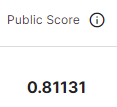

# IQR 이상치 중앙값 처리 앙상블

In [131]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from tqdm import tqdm
import tensorflow.compat.v1 as tf1
import os



def tqdm_wrapper(iterable, **kwargs):
    return tqdm(iterable, **kwargs)


kf = KFold(n_splits=5, shuffle=True, random_state=42)


param_grid = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}


best_params = {}
results = {}


for name, config in tqdm_wrapper(param_grid.items(), desc='Model Evaluation'):
    print(f"\nGrid Search for {name}...")
    grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_cleaned, y_train)
    
    best_params[name] = grid_search.best_params_
    results[name] = grid_search.best_score_
    
    print(f"Best parameters for {name}: {best_params[name]}")
    print(f"Best cross-validated accuracy for {name}: {results[name]:.4f}")


print("\nFinal Results:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


print("\nBest Parameters:")
for name, params in best_params.items():
    print(f"{name}: {params}")


Model Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]


Grid Search for KNN...


Model Evaluation:  20%|██        | 1/5 [03:38<14:32, 218.18s/it]

Best parameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best cross-validated accuracy for KNN: 0.7549

Grid Search for Decision Tree...


Model Evaluation:  40%|████      | 2/5 [04:10<05:26, 108.87s/it]

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validated accuracy for Decision Tree: 0.7950

Grid Search for Random Forest...


Model Evaluation:  60%|██████    | 3/5 [46:11<40:20, 1210.48s/it]

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validated accuracy for Random Forest: 0.8118

Grid Search for AdaBoost...


Model Evaluation:  80%|████████  | 4/5 [47:44<12:49, 769.26s/it] 

Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Best cross-validated accuracy for AdaBoost: 0.8103

Grid Search for Gradient Boosting...


Model Evaluation: 100%|██████████| 5/5 [1:22:01<00:00, 984.27s/it] 

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best cross-validated accuracy for Gradient Boosting: 0.8159

Final Results:
KNN: 0.7549
Decision Tree: 0.7950
Random Forest: 0.8118
AdaBoost: 0.8103
Gradient Boosting: 0.8159

Best Parameters:
KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Random Forest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [132]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from tqdm import tqdm
import tensorflow.compat.v1 as tf1
import os
import joblib


def tqdm_wrapper(iterable, **kwargs):
    return tqdm(iterable, **kwargs)


kf = KFold(n_splits=5, shuffle=True, random_state=42)


param_grid = {
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', tree_method='gpu_hist', predictor='gpu_predictor'),
        'params': {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'max_depth': [3],
            'subsample': [1.0],
            'colsample_bytree': [1.0]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(random_state=42, verbose=0, task_type="GPU"),
        'params': {
            'iterations': [100],
            'learning_rate': [0.1],
            'depth': [3]
        }
    },
    'LightGBM': {
        'model': lgb.LGBMClassifier(random_state=42, device_type='cpu'),
        'params': {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'num_leaves': [31],
            'max_depth': [10]
        }
    }
}


best_params = {}
results = {}


with joblib.parallel_backend('threading'):
    
    for name, config in tqdm_wrapper(param_grid.items(), desc='Model Evaluation'):
        print(f"\nGrid Search for {name}...")
        grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=kf, scoring='accuracy', n_jobs=1)
        grid_search.fit(X_train_cleaned, y_train)

        best_params[name] = grid_search.best_params_
        results[name] = grid_search.best_score_

        print(f"Best parameters for {name}: {best_params[name]}")
        print(f"Best cross-validated accuracy for {name}: {results[name]:.4f}")

print("\nFinal Results:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


print("\nBest Parameters:")
for name, params in best_params.items():
    print(f"{name}: {params}")


Model Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]


Grid Search for XGBoost...


Model Evaluation:  33%|███▎      | 1/3 [00:10<00:21, 10.86s/it]

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validated accuracy for XGBoost: 0.8110

Grid Search for CatBoost...


Model Evaluation:  67%|██████▋   | 2/3 [00:30<00:16, 16.26s/it]

Best parameters for CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}
Best cross-validated accuracy for CatBoost: 0.8089

Grid Search for LightGBM...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.252854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 23
[LightGBM] [Info] Start training from score -1.105333
[LightGBM] [Info] Start training from score -1.635907
[LightGBM] [Info] Start training fr

Model Evaluation: 100%|██████████| 3/3 [1:26:27<00:00, 1729.27s/it]

Best parameters for LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}
Best cross-validated accuracy for LightGBM: 0.8161

Final Results:
XGBoost: 0.8110
CatBoost: 0.8089
LightGBM: 0.8161

Best Parameters:
XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}
LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}


## Best Parameters:
- KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
- Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
- Random Forest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
- AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
- Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
- XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
- CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}
- LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}

In [133]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb


X_train, X_test, y_train, y_test = train_test_split(X_train_cleaned, y_train, test_size=0.2, random_state=42)


models = {
    'knn': KNeighborsClassifier(n_neighbors=7, p=1, weights='distance'),
    'decision_tree': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=2),
    'random_forest': RandomForestClassifier(criterion='gini', max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300),
    'adaboost': AdaBoostClassifier(learning_rate=1, n_estimators=200),
    'gradient_boosting': GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=300),
    'xgboost': xgb.XGBClassifier(colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0),
    'catboost': CatBoostClassifier(depth=3, iterations=100, learning_rate=0.1, verbose=0),  
    'lightgbm': lgb.LGBMClassifier(learning_rate=0.1, max_depth=10, n_estimators=100, num_leaves=31)
}


voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='soft'  
)


voting_clf.fit(X_train, y_train)


ensemble_accuracy = voting_clf.score(X_test, y_test)


print("\nEnsemble Model Accuracy: {:.4f}".format(ensemble_accuracy))


print("\nFinal Results:")
for name, model in models.items():
    print(f"{name}: {model.get_params()}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.474469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 23
[LightGBM] [Info] Start training from score -1.105333
[LightGBM] [Info] Start training from score -1.635907
[LightGBM] [Info] Start training from score -0.746287
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Ensemble Model

In [135]:
test = pd.read_csv(path + 'test.csv')
test = test.drop(['id'], axis=1)
test_cleaned = replace_outliers_with_median(test.copy(), test.columns)



In [138]:
test_cleaned = test_cleaned.drop(['id'], axis=1)

In [139]:
y_pred = voting_clf.predict(test_cleaned)
y_pred_proba = voting_clf.predict_proba(test_cleaned)  


print("\nPredicted Classes for X_test:")
print(y_pred)

print("\nPredicted Probabilities for X_test:")
print(y_pred_proba)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Predicted Classes for X_test:
[0 2 2 ... 0 1 0]

Predicted Probabilities for X_test:
[[0.82224308 0.07962907 0.09812785]
 [0.05228693 0.06898275 0.87873032]
 [0.12729149 0.35410617 0.51860234]
 ...
 [0.73124223 0.11913463 0.14962314]
 [0.26199369 0.49137631 0.24662999]
 [0.75564828 0.1319682  0.11238353]]


In [140]:
submit['Target']= y_pred
submit

,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,1
4,76522,1
...,...,...
51007,127525,0
51008,127526,0
51009,127527,0
51010,127528,1


In [141]:
submit['Target'] = label_encoder.inverse_transform(submit['Target'])

In [142]:
submit.to_csv('v7.csv',index = False, quoting = 3)
submit.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


## 최종결과
#### 앙상블 : knn , decision tree, random forest, adaboost, gradient boosting, xgboost, catboost, lightgbm 그리드 서치 진행


- #### 모든 Feature 데이터를 사용한 앙상블 :  0.83081
- 모든 Feature 데이터를 사용한 FCNN : 0.82307
- 
- IQR 이상치 삭제 후 Feature 데이터를 사용한 앙상블 : 0.81170
- IQR 이상치 삭제 후 Feature 데이터를 사용한 FCNN : 0.81395
- 
- IQR 이상치 중앙값 처리 후 Feature 데이터를 사용한 앙상블 : 
- IQR 이상치 중앙값 처리 후 Feature 데이터를 사용한 FCNN : 0.81131

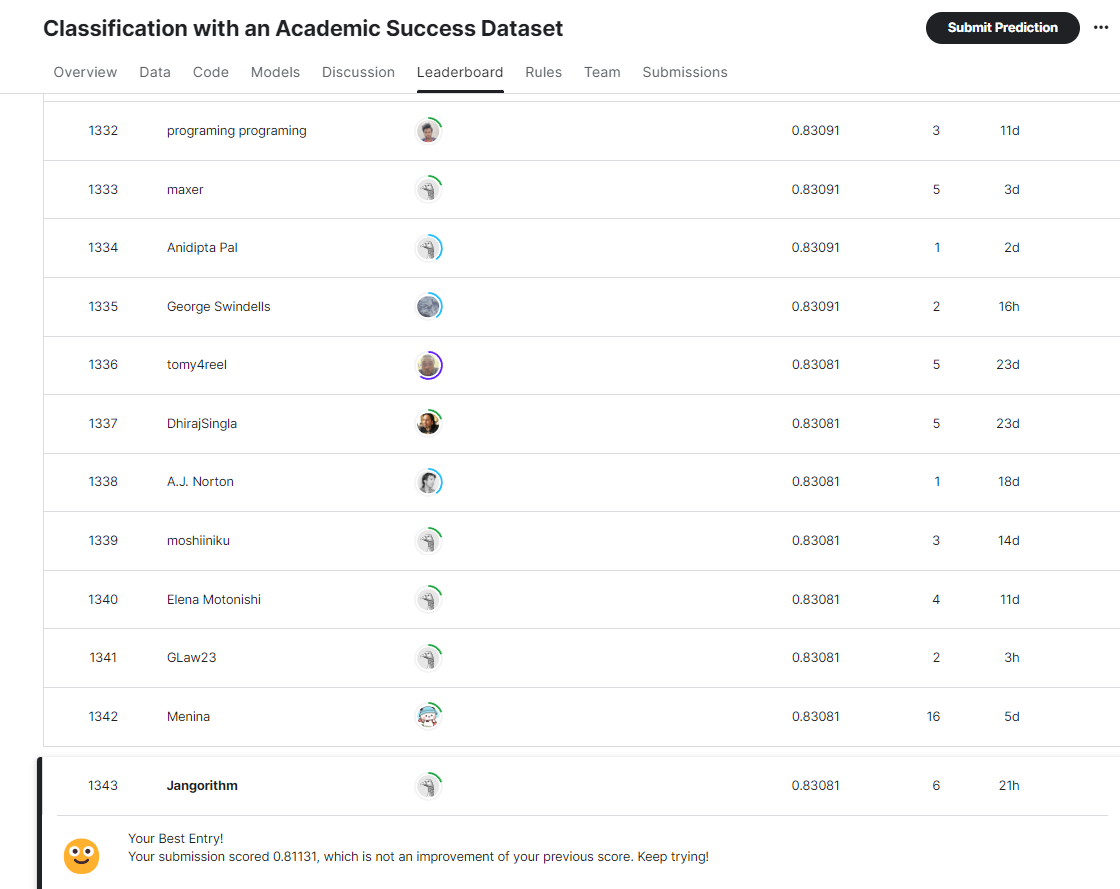